In [ ]:
from google.colab import files
uploaded = files.upload()


import sys, os

sys.path
sys.executable

Saving chat-data.zip to chat-data.zip
Saving combined-data.zip to combined-data.zip


'/usr/bin/python3'

In [ ]:
!apt-get install openjdk-8-jdk-headless

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libxtst6 openjdk-8-jre-headless
Suggested packages:
  openjdk-8-demo openjdk-8-source libnss-mdns fonts-dejavu-extra
  fonts-ipafont-gothic fonts-ipafont-mincho fonts-wqy-microhei
  fonts-wqy-zenhei fonts-indic
The following NEW packages will be installed:
  libxtst6 openjdk-8-jdk-headless openjdk-8-jre-headless
0 upgraded, 3 newly installed, 0 to remove and 24 not upgraded.
Need to get 36.5 MB of archives.
After this operation, 144 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/main amd64 libxtst6 amd64 2:1.2.3-1 [12.8 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal-updates/universe amd64 openjdk-8-jre-headless amd64 8u372-ga~us1-0ubuntu1~20.04 [28.3 MB]
Get:3 http://archive.ubuntu.com/ubuntu focal-updates/universe amd64 openjdk-8-jdk-headless amd64 8u372-ga~us1-0ubuntu1~20.04 [8,282 kB]
Fetched 

In [ ]:
!wget https://archive.apache.org/dist/spark/spark-3.2.1/spark-3.2.1-bin-hadoop2.7.tgz

--2023-05-17 17:14:08--  https://archive.apache.org/dist/spark/spark-3.2.1/spark-3.2.1-bin-hadoop2.7.tgz
Resolving archive.apache.org (archive.apache.org)... 138.201.131.134, 2a01:4f8:172:2ec5::2
Connecting to archive.apache.org (archive.apache.org)|138.201.131.134|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 272637746 (260M) [application/x-gzip]
Saving to: ‘spark-3.2.1-bin-hadoop2.7.tgz’

spark-3.2.1-bin-had 100%[===================>] 260.01M  99.9KB/s    in 44m 27s 

2023-05-17 17:58:35 (99.8 KB/s) - ‘spark-3.2.1-bin-hadoop2.7.tgz’ saved [272637746/272637746]



In [ ]:
!tar xf /content/spark-3.2.1-bin-hadoop2.7.tgz

In [ ]:
!pip install -q findspark
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317130 sha256=2cee2783fc88f5c568b6d76b45709108607c6df8e92a3661aab03df5dcf29960
  Stored in directory: /root/.cache/pip/wheels/7b/1b/4b/3363a1d04368e7ff0d408e57ff57966fcdf00583774e761327
Successfully built pyspark


In [ ]:
import os

os.environ["JAVA_HOME"] =  "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.1-bin-hadoop2.7"


import findspark

findspark.init()
findspark.find()

'/content/spark-3.2.1-bin-hadoop2.7'

In [ ]:
import pyspark


sc = pyspark.SparkContext(master="local[*]", appName="FirstExample")

In [ ]:
sc.setLogLevel("ERROR")

In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.master("local").appName("assessment_bigdata").config("spark.ui.port", "4050").getOrCreate()

In [ ]:
spark

In [ ]:
!unzip "/content/chat-data.zip"
!unzip "/content/combined-data.zip"

Archive:  /content/chat-data.zip
   creating: chat-data/
  inflating: chat-data/chat_join_team_chat.csv  
  inflating: chat-data/chat_leave_team_chat.csv  
  inflating: chat-data/chat_mention_team_chat.csv  
  inflating: chat-data/chat_respond_team_chat.csv  
Archive:  /content/combined-data.zip
  inflating: combined-data.csv       


In [ ]:
buy_clicks_df = spark.read.csv("buy-clicks.csv", header=True, inferSchema=True)

In [ ]:
buy_clicks_df.printSchema()

root
 |-- timestamp: string (nullable = true)
 |-- txId: integer (nullable = true)
 |-- userSessionId: integer (nullable = true)
 |-- team: integer (nullable = true)
 |-- userId: integer (nullable = true)
 |-- buyId: integer (nullable = true)
 |-- price: double (nullable = true)



In [ ]:
buy_clicks_df.show(5)

+-------------------+----+-------------+----+------+-----+-----+
|          timestamp|txId|userSessionId|team|userId|buyId|price|
+-------------------+----+-------------+----+------+-----+-----+
|2016-05-26 15:36:54|6004|         5820|   9|  1300|    2|  3.0|
|2016-05-26 15:36:54|6005|         5775|  35|   868|    4| 10.0|
|2016-05-26 15:36:54|6006|         5679|  97|   819|    5| 20.0|
|2016-05-26 16:36:54|6067|         5665|  18|   121|    2|  3.0|
|2016-05-26 17:06:54|6093|         5709|  11|  2222|    5| 20.0|
+-------------------+----+-------------+----+------+-----+-----+
only showing top 5 rows



In [ ]:

buy_clicks_df.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
timestamp,2947,None,None,2016-05-26 15:36:54,2016-06-16 10:36:54
txId,2947,25443.01085850017,9343.543792592367,6004,39842
userSessionId,2947,22884.75229046488,8669.35362676463,5652,39275
team,2947,70.31896844248388,40.27452540199273,2,178
userId,2947,1187.4591109602986,685.7038088341923,1,2387
buyId,2947,2.530709195792331,1.7799870722907862,0,5
price,2947,7.263997285374957,7.076313004712134,1.0,20.0


Exploratory Data Analysis

In [ ]:
# EXPLORATORY DATA ANALYSIS

users_df = spark.read.csv("users.csv", header=True, inferSchema=True)
team_df = spark.read.csv("team.csv", header=True, inferSchema=True)
adclicks_df = spark.read.csv("ad-clicks.csv", header=True, inferSchema=True)
buyclicks_df = spark.read.csv("buy-clicks.csv", header=True, inferSchema=True)

users_df.show(5)

+-------------------+------+-----------+--------+----------+-------+
|          timestamp|userId|       nick| twitter|       dob|country|
+-------------------+------+-----------+--------+----------+-------+
|2012-06-19 14:53:41|   442|   pcjIOBKW|@SZhyOHv|1994-07-20|     BA|
|2012-06-19 19:29:01|   949|    vAOfUkf|  @nkkNo|1971-04-22|     HU|
|2012-06-20 19:34:59|  1654|     qOOXSQ|  @SwOlw|1970-04-19|     IS|
|2012-06-21 01:18:29|  1586|    px4gW51|@IrCHTnE|1965-11-23|     AM|
|2012-06-21 15:35:00|   599|9gkfwRC73Uc| @VJj0Az|1994-08-23|     CC|
+-------------------+------+-----------+--------+----------+-------+
only showing top 5 rows



In [ ]:
# CONVERT DOB TO AGE

from pyspark.sql import functions as f



# Resource for below Code : https://stackoverflow.com/questions/62148704/date-difference-in-years-in-pyspark-dataframe

users_with_age_df = users_df.withColumn("age",   (f.months_between(f.current_date(), f.col('dob')) / 12).cast('int'))

users_with_age_df.show(5)

+-------------------+------+-----------+--------+----------+-------+---+
|          timestamp|userId|       nick| twitter|       dob|country|age|
+-------------------+------+-----------+--------+----------+-------+---+
|2012-06-19 14:53:41|   442|   pcjIOBKW|@SZhyOHv|1994-07-20|     BA| 28|
|2012-06-19 19:29:01|   949|    vAOfUkf|  @nkkNo|1971-04-22|     HU| 52|
|2012-06-20 19:34:59|  1654|     qOOXSQ|  @SwOlw|1970-04-19|     IS| 53|
|2012-06-21 01:18:29|  1586|    px4gW51|@IrCHTnE|1965-11-23|     AM| 57|
|2012-06-21 15:35:00|   599|9gkfwRC73Uc| @VJj0Az|1994-08-23|     CC| 28|
+-------------------+------+-----------+--------+----------+-------+---+
only showing top 5 rows



In [ ]:
# list(users_with_age_df.toPandas()["age"].values)
users_with_age_df.show()

+-------------------+------+-----------+----------+----------+-------+---+
|          timestamp|userId|       nick|   twitter|       dob|country|age|
+-------------------+------+-----------+----------+----------+-------+---+
|2012-06-19 14:53:41|   442|   pcjIOBKW|  @SZhyOHv|1994-07-20|     BA| 28|
|2012-06-19 19:29:01|   949|    vAOfUkf|    @nkkNo|1971-04-22|     HU| 52|
|2012-06-20 19:34:59|  1654|     qOOXSQ|    @SwOlw|1970-04-19|     IS| 53|
|2012-06-21 01:18:29|  1586|    px4gW51|  @IrCHTnE|1965-11-23|     AM| 57|
|2012-06-21 15:35:00|   599|9gkfwRC73Uc|   @VJj0Az|1994-08-23|     CC| 28|
|2012-06-22 11:36:19|   952| BRbb3VOTti|   @b4OK6K|1986-09-11|     MH| 36|
|2012-06-23 08:11:18|  1056|    fGCIAtI| @IgDsdWdU|1991-11-28|     SM| 31|
|2012-06-23 10:54:19|    91|tpDfgi3S0N9|   @LvTHGO|1977-07-03|     BZ| 45|
|2012-06-23 14:59:26|   809| LkNRpRW6Ez|@ROrRkXwdh|1951-09-25|     PF| 71|
|2012-06-23 17:40:35|    75|     fNWewX|   @OXqLyv|1979-11-12|     JO| 43|
|2012-06-23 17:57:05|  22

In [ ]:
users_with_age_df.toPandas()[["age"]].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,2393.0,46.163393,14.070283,24.0,34.0,44.0,57.0,76.0


In [ ]:
from pyspark.sql.functions import udf


age_range = udf(lambda age: '< 20' if age < 20 else 
                       '20-29' if (age >= 20 and age < 30) else
                       '30-39' if (age >= 30 and age < 40) else
                       '40-49' if (age >= 40 and age < 50) else        
                       '50-59' if (age >= 50 and age < 60) else
                       '60-70' if (age >= 60 and age < 70) else
                       '70-79' if (age >= 70 and age < 79) else
                       '80-100' if (age >= 80 and age < 101)  else ""    
                       )

users_with_age_df = users_with_age_df.withColumn('age_group', age_range(users_with_age_df.age))
users_with_age_df.show()

+-------------------+------+-----------+----------+----------+-------+---+---------+
|          timestamp|userId|       nick|   twitter|       dob|country|age|age_group|
+-------------------+------+-----------+----------+----------+-------+---+---------+
|2012-06-19 14:53:41|   442|   pcjIOBKW|  @SZhyOHv|1994-07-20|     BA| 28|    20-29|
|2012-06-19 19:29:01|   949|    vAOfUkf|    @nkkNo|1971-04-22|     HU| 52|    50-59|
|2012-06-20 19:34:59|  1654|     qOOXSQ|    @SwOlw|1970-04-19|     IS| 53|    50-59|
|2012-06-21 01:18:29|  1586|    px4gW51|  @IrCHTnE|1965-11-23|     AM| 57|    50-59|
|2012-06-21 15:35:00|   599|9gkfwRC73Uc|   @VJj0Az|1994-08-23|     CC| 28|    20-29|
|2012-06-22 11:36:19|   952| BRbb3VOTti|   @b4OK6K|1986-09-11|     MH| 36|    30-39|
|2012-06-23 08:11:18|  1056|    fGCIAtI| @IgDsdWdU|1991-11-28|     SM| 31|    30-39|
|2012-06-23 10:54:19|    91|tpDfgi3S0N9|   @LvTHGO|1977-07-03|     BZ| 45|    40-49|
|2012-06-23 14:59:26|   809| LkNRpRW6Ez|@ROrRkXwdh|1951-09-25|   

In [ ]:
data = users_with_age_df.toPandas()
data.loc[data['age']<=19, 'age_group'] = 'teenage'
data.loc[data['age'].between(20,35), 'age_group'] = '20-35'
data.loc[data['age'].between(36,50), 'age_group'] = '36-50'
data.loc[data['age'].between(51,65), 'age_group'] = '51-65'
data.loc[data['age'].between(66,100), 'age_group'] = '66-100'

data

,timestamp,userId,nick,twitter,dob,country,age,age_group
0,2012-06-19 14:53:41,442,pcjIOBKW,@SZhyOHv,1994-07-20,BA,28,20-35
1,2012-06-19 19:29:01,949,vAOfUkf,@nkkNo,1971-04-22,HU,52,51-65
2,2012-06-20 19:34:59,1654,qOOXSQ,@SwOlw,1970-04-19,IS,53,51-65
3,2012-06-21 01:18:29,1586,px4gW51,@IrCHTnE,1965-11-23,AM,57,51-65
4,2012-06-21 15:35:00,599,9gkfwRC73Uc,@VJj0Az,1994-08-23,CC,28,20-35
...,...,...,...,...,...,...,...,...
2388,2016-06-11 05:17:17,2312,CJOHXgqKh,@ZomNVFWoF,1996-10-05,MT,26,20-35
2389,2016-06-14 03:19:04,100,lJexGia,@BYQ14xmNd,1987-05-25,CR,35,20-35
2390,2016-06-14 10:40:22,651,iynipG41EV,@nXTCcg7sV,1987-04-08,CI,36,36-50
2391,2016-06-15 16:33:25,2390,hH9wrFLdTt,@KimUIQF,1991-03-02,TK,32,20-35


In [ ]:
from pyspark.sql import Window
from pyspark.sql.functions import rank,sum,col
import pyspark.sql.functions as f


window = Window.rowsBetween(Window.unboundedPreceding,Window.unboundedFollowing)

w = Window.partitionBy('x')

users_with_age_df_grouped = users_with_age_df.groupBy('age_group').count()\
        .select('age_group', f.col('count').alias('age_group_count'))\
        .sort(f.asc("age_group")) 


users_with_age_df_grouped.show()

+---------+---------------+
|age_group|age_group_count|
+---------+---------------+
|    20-29|            310|
|    30-39|            602|
|    40-49|            552|
|    50-59|            431|
|    60-70|            326|
|    70-79|            172|
+---------+---------------+



In [ ]:
team_df = spark.read.csv("team.csv", header=True, inferSchema=True)
buyclicks_df = spark.read.csv("buy-clicks.csv", header=True, inferSchema=True)


team_buying_df = team_df.alias("teamdf").join(buyclicks_df.alias("buyclicks"),\
                            f.col("teamdf.teamId") == f.col("buyclicks.team"),"inner")

team_buying_df_grouped = team_buying_df.groupBy("teamId").sum("price", "strength")\
         .select('teamId', f.col('sum(price)').alias('total_spending'), f.col('sum(strength)').alias('total_strength'))\
         .orderBy("sum(price)")

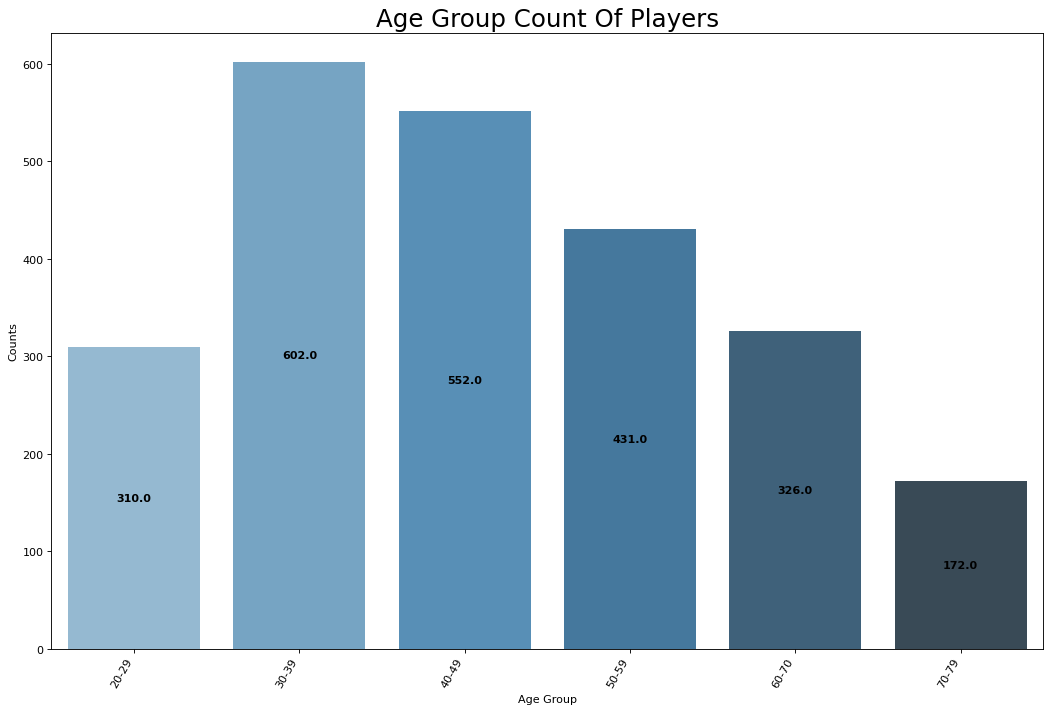

In [ ]:
# users_with_age_df.toPandas().hist(column = "age", bins = 10)
import matplotlib.pyplot as plt
import seaborn as sns

import random

# Import Data
df_raw = users_with_age_df_grouped



# Prepare Data
df = users_with_age_df_grouped.toPandas()
n = users_with_age_df_grouped["age_group"].size+1


all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k=7)

# Plot Bars
plt.figure(figsize=(16, 10), dpi=80)
ax = sns.barplot(x="age_group", y="age_group_count", data=df, palette="Blues_d")

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height}', (x + width / 2, y + height / 2), ha='center', va='center', fontweight='bold')

# Decoration
plt.gca().set_xticklabels(df['age_group'], rotation=60, horizontalalignment='right')
plt.title("Age Group Count Of Players", fontsize=22)
plt.ylabel('Counts')
plt.xlabel('Age Group')
plt.show()

In [ ]:
users_with_age_df.groupBy("country").count().orderBy("count").show(6)

+-------+-----+
|country|count|
+-------+-----+
|     UA|    9|
|     SD|    9|
|     EE|    9|
|     MR|    9|
|     CM|    9|
|     AZ|    9|
+-------+-----+
only showing top 6 rows



In [ ]:
!pip install scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df

,age_group,age_group_count
0,20-29,310
1,30-39,602
2,40-49,552
3,50-59,431
4,60-70,326
5,70-79,172


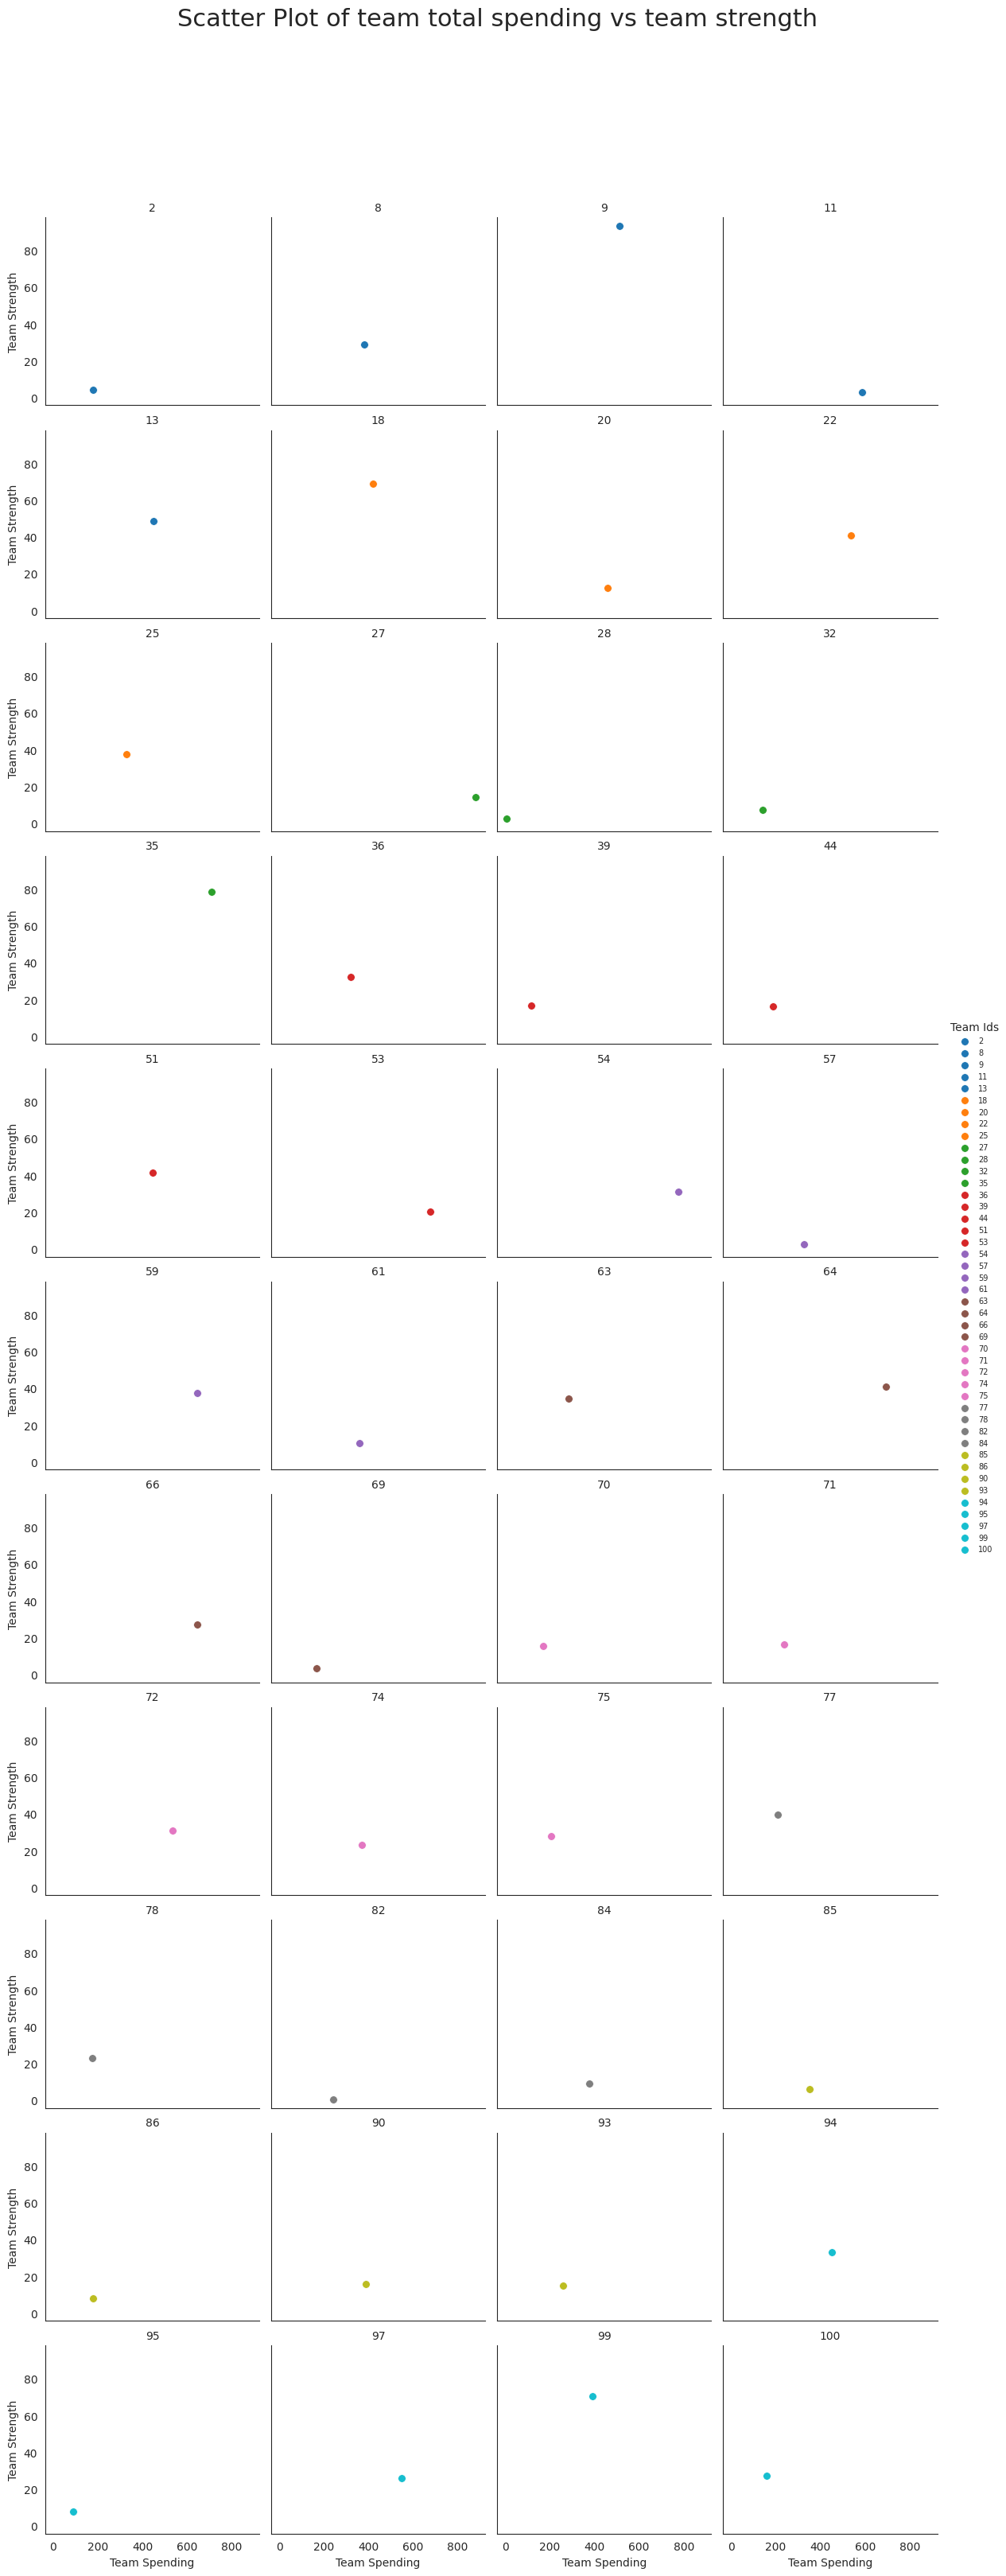

0.3967449588436291

In [ ]:
from matplotlib import patches
from scipy.spatial import ConvexHull
import numpy as np
import seaborn as sns
import warnings; warnings.simplefilter('ignore')
sns.set_style("white")

# Step 1: Prepare Data
df = team_buying_df_grouped.toPandas() 

# As many colors as there are unique teamId
categories = np.unique(df['teamId'])
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]

# Step 2: Create FacetGrid
g = sns.FacetGrid(df, col='teamId', col_wrap=4, hue='teamId', palette=colors)

# Step 3: Draw Scatterplot in each facet
g.map(sns.scatterplot, 'total_spending', 'total_strength', s=50)

# Step 4: Decorations
g.set_titles('{col_name}')
g.set_xlabels('Team Spending')
g.set_ylabels('Team Strength')
g.add_legend(title='Team Ids', fontsize=7)

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Scatter Plot of team total spending vs team strength', fontsize=22)

plt.show()


team_buying_df_grouped.stat.corr("total_spending","total_strength")

In [ ]:
!pip install pycountry_convert 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 55.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.2/228.2 kB 28.3 MB/s eta 0:00:00
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681832 sha256=d19ab85c4e3f45b99ca6ec9659fc0989df00db651a8297d5f14161f11de64555
  Stored in directory: /root/.cache/pip/wheels/03/57/cc/290c5252ec97a6d78d36479a3c5e5ecc76318afcb241ad9dbe
Successfully built pycountry


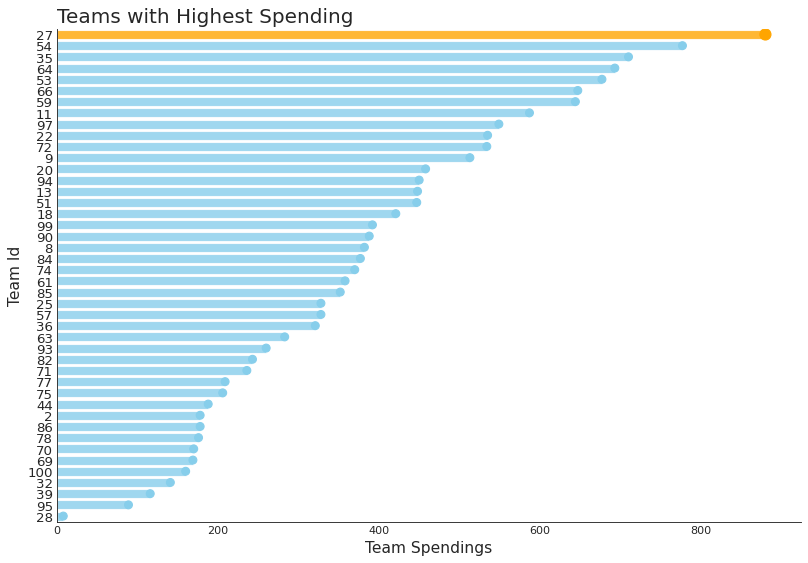

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Prepare Data
df = team_buying_df_grouped.toPandas()

# Reorder it based on values
ordered_df = df.sort_values(by='total_spending')
my_range = range(1, len(df.index) + 1)

# Create a color if the group is "B"
my_color = np.where(ordered_df['total_spending'] == ordered_df['total_spending'].max(), 'orange', 'skyblue')
my_size = np.where(ordered_df['total_spending'] == ordered_df['total_spending'].max(), 100, 50)

fig, ax = plt.subplots(figsize=(12, 8), dpi=80)

# The vertical plot is made using the barh() function
ax.barh(my_range, ordered_df['total_spending'], color=my_color, alpha=0.8)

ax.scatter(ordered_df['total_spending'], my_range, color=my_color, s=my_size, alpha=1)

# Add title and axis names
ax.set_yticks(my_range)
ax.set_yticklabels(ordered_df['teamId'], fontsize=12)
ax.set_title("Teams with Highest Spending", fontsize=18, loc='left')
ax.set_xlabel('Team Spendings', fontsize=14)
ax.set_ylabel('Team Id', fontsize=14)

# Remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Adjust tick parameters
ax.tick_params(axis='both', which='both', length=0)

# Adjust y-axis limits
plt.ylim(0.5, len(df.index) + 0.5)

# Show the graph
plt.show()

In [ ]:
# TEAM SPENDING WITH AGE GROUP
team_user_buying_df = team_buying_df.alias("team_buying_df").join(users_df.alias("users_df"),\
                           f.col("team_buying_df.userId") == f.col("users_df.userId"),"inner")

In [ ]:
import pycountry_convert as pc
from pyspark.sql.types import StringType


def country_to_continent(country_name):
  try:
    country_continent_code = pc.country_alpha2_to_continent_code(country_name)
    country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    return country_continent_name
  except:
    return "None"

udf_country_to_continent = f.udf(country_to_continent , StringType())
team_user_buying_df = team_user_buying_df.withColumn("continent", udf_country_to_continent(f.col("country") ))



team_user_buying_df.show()

+------+-----------+-------------------+-------------------+---------------+------------+-------------------+----+-------------+----+------+-----+-----+-------------------+------+----------+----------+----------+-------+-------------+
|teamId|       name|   teamCreationTime|        teamEndTime|       strength|currentLevel|          timestamp|txId|userSessionId|team|userId|buyId|price|          timestamp|userId|      nick|   twitter|       dob|country|    continent|
+------+-----------+-------------------+-------------------+---------------+------------+-------------------+----+-------------+----+------+-----+-----+-------------------+------+----------+----------+----------+-------+-------------+
|     9|  pDG2bAh8T|2016-06-13 17:39:55|9999-12-31 23:59:59| 0.952175553216|           1|2016-05-26 15:36:54|6004|         5820|   9|  1300|    2|  3.0|2013-12-01 09:30:47|  1300|   2hh0NNM|  @RY1URF2|1998-05-06|     GR|       Europe|
|    35|b3PqpjmZ6TT|2016-06-14 02:08:07|9999-12-31 23:59:59|

In [ ]:
from pyspark.sql import Window
from pyspark.sql.functions import rank,sum,col


window = Window.rowsBetween(Window.unboundedPreceding,Window.unboundedFollowing)

team_user_buying_df_stat = team_user_buying_df.groupby("continent").agg(f.sum('price').alias('spending_count'),
                                        f.mean('price').alias('price_avg'),
                                        f.min('price').alias('price_min'),
                                        f.max('price').alias('price_max')).\
   withColumn('total',sum(f.col('spending_count')).over(window)).\
   withColumn('Percent',f.col('spending_count')*100/f.col('total'))

team_user_buying_df_stat.show()

+-------------+--------------+------------------+---------+---------+-------+------------------+
|    continent|spending_count|         price_avg|price_min|price_max|  total|           Percent|
+-------------+--------------+------------------+---------+---------+-------+------------------+
|         None|         684.0|              11.4|      1.0|     20.0|16576.0| 4.126447876447877|
|       Europe|        2974.0| 7.548223350253807|      1.0|     20.0|16576.0|17.941602316602317|
|       Africa|        3889.0| 7.282771535580524|      1.0|     20.0|16576.0|23.461631274131275|
|North America|        2726.0| 7.593314763231198|      1.0|     20.0|16576.0|16.445463320463322|
|   Antarctica|          51.0|             2.125|      1.0|     10.0|16576.0|0.3076737451737452|
|South America|        1416.0|10.114285714285714|      1.0|     20.0|16576.0| 8.542471042471043|
|      Oceania|        1410.0| 5.802469135802469|      1.0|     20.0|16576.0|  8.50627413127413|
|         Asia|        3426.0|

In [ ]:
!pip install squarify 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pywaffle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.2/25.2 MB 41.7 MB/s eta 0:00:00


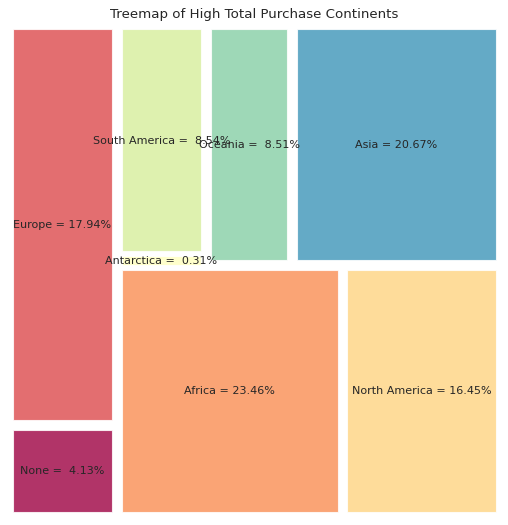

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import squarify

# Get dataframe continent & Percent columns as list
labels = list(team_user_buying_df_stat.toPandas()["continent"])
sizes = list(team_user_buying_df_stat.toPandas()["Percent"])

# Calculate percentage for labels
perc = [f'{i/team_user_buying_df_stat.toPandas()["Percent"].sum()*100:5.2f}%' for i in team_user_buying_df_stat.toPandas()["Percent"]]

# Select colors
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# Plot the treemap using Slice and Dice layout
plt.figure(figsize=(16, 8), dpi=80)
plt.title('Treemap of High Total Purchase Continents')

# Create the rectangles for the treemap using Slice and Dice layout
squarify.plot(sizes=sizes, label=lbl, color=colors, alpha=0.8, pad=True)

# Remove axis and set aspect ratio to 'equal'
plt.axis('off')
plt.gca().set_aspect('equal')

plt.show()

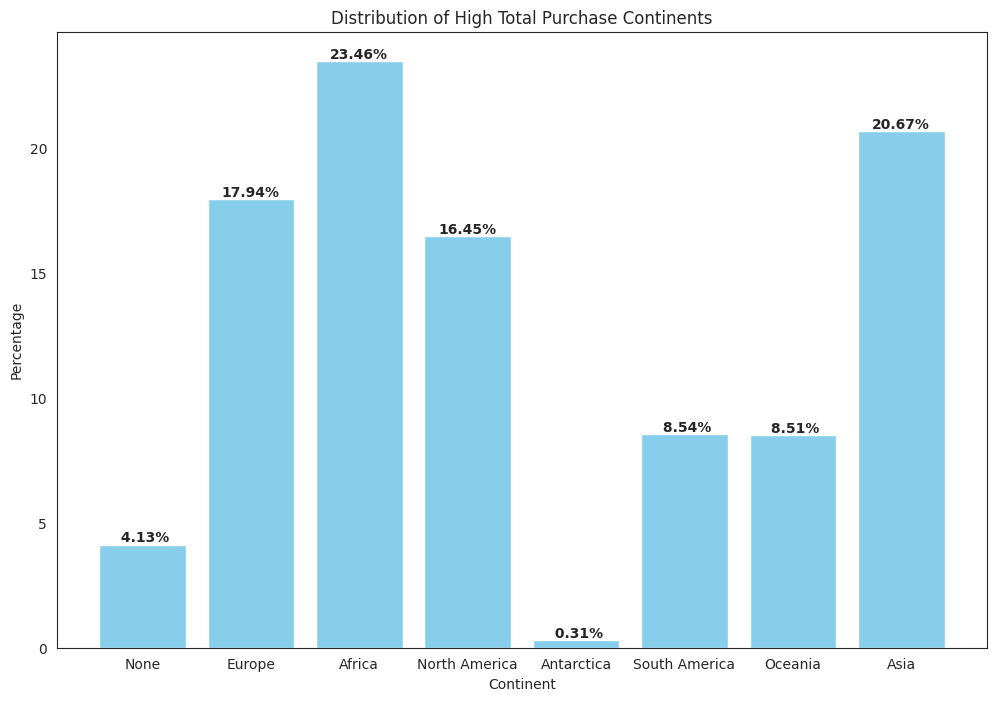

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Get dataframe continent & Percent columns as list
labels = list(team_user_buying_df_stat.toPandas()["continent"])
sizes = list(team_user_buying_df_stat.toPandas()["Percent"])

# Calculate percentage for labels
perc = [f'{i/team_user_buying_df_stat.toPandas()["Percent"].sum()*100:5.2f}%' for i in team_user_buying_df_stat.toPandas()["Percent"]]

# Plot bar chart
plt.figure(figsize=(12, 8))
plt.bar(labels, sizes, color='skyblue')

# Add data labels
for i, (size, label) in enumerate(zip(sizes, labels)):
    plt.text(label, size, perc[i], ha='center', va='bottom', fontweight='bold')

# Set title and axis labels
plt.title('Distribution of High Total Purchase Continents')
plt.xlabel('Continent')
plt.ylabel('Percentage')

plt.show()

In [ ]:
team_user_buying_df_stat.show()

+-------------+--------------+------------------+---------+---------+-------+------------------+
|    continent|spending_count|         price_avg|price_min|price_max|  total|           Percent|
+-------------+--------------+------------------+---------+---------+-------+------------------+
|         None|         684.0|              11.4|      1.0|     20.0|16576.0| 4.126447876447877|
|       Europe|        2974.0| 7.548223350253807|      1.0|     20.0|16576.0|17.941602316602317|
|       Africa|        3889.0| 7.282771535580524|      1.0|     20.0|16576.0|23.461631274131275|
|North America|        2726.0| 7.593314763231198|      1.0|     20.0|16576.0|16.445463320463322|
|   Antarctica|          51.0|             2.125|      1.0|     10.0|16576.0|0.3076737451737452|
|South America|        1416.0|10.114285714285714|      1.0|     20.0|16576.0| 8.542471042471043|
|      Oceania|        1410.0| 5.802469135802469|      1.0|     20.0|16576.0|  8.50627413127413|
|         Asia|        3426.0|

ValueError: ignored

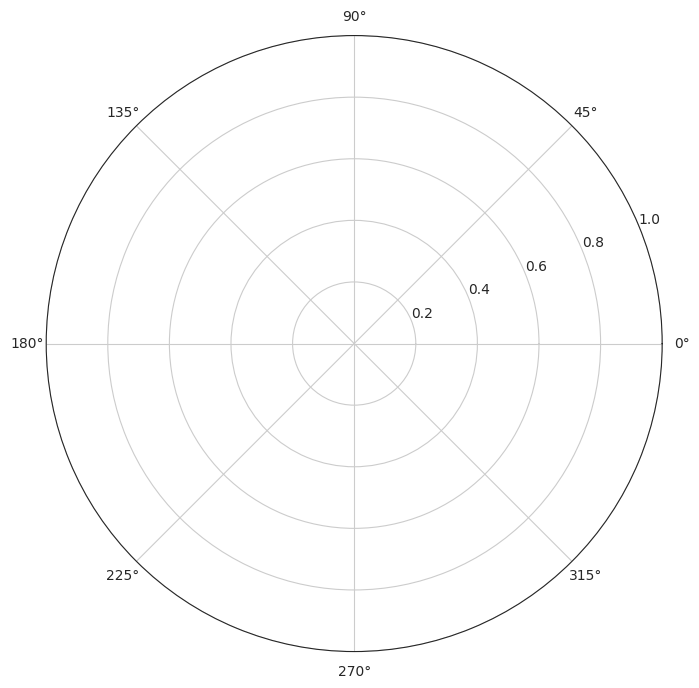

In [ ]:
import matplotlib.pyplot as plt

labels = list(team_user_buying_df_stat.toPandas()["continent"])
sizes = list(team_user_buying_df_stat.toPandas()["Percent"])
colors = ['gold', 'yellowgreen', 'lightcoral', 'blue', 'lightskyblue', 'green', 'red', 'brown']

# Calculate the angles for the sectors
angles = [i / len(labels) * 2 * 3.14159 for i in range(len(labels))]

# Plot the polar area chart
plt.figure(figsize=(8, 8))
plt.polar(angles, sizes, marker='o', linestyle='-', color=colors)

# Set the labels for each sector
plt.thetagrids([a * 180 / 3.14159 for a in angles], labels)

# Set the radial axis label
plt.rgrids([])

# Add a title
plt.title('Polar Area Chart of High Spending Continents')

plt.show()


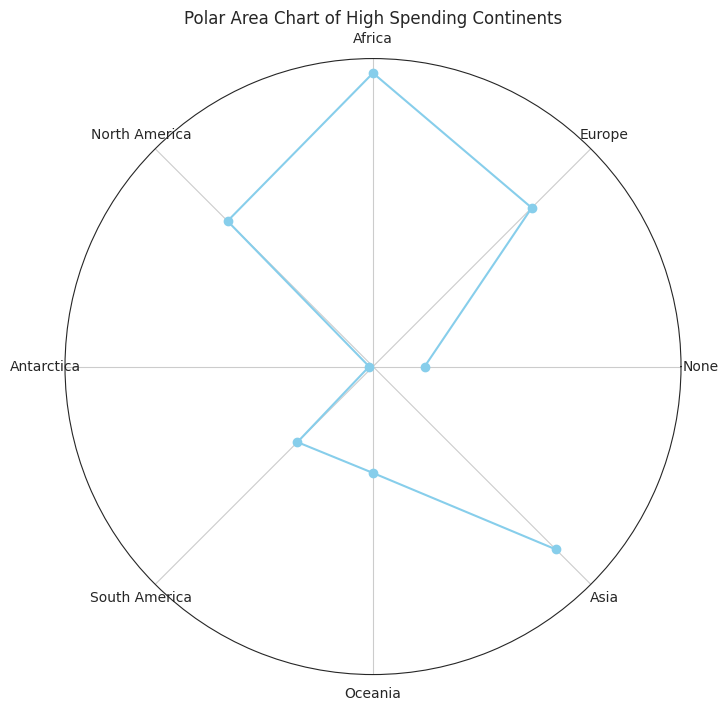

In [ ]:
import matplotlib.pyplot as plt

labels = list(team_user_buying_df_stat.toPandas()["continent"])
sizes = list(team_user_buying_df_stat.toPandas()["Percent"])
color = 'skyblue'  # Change color as desired

# Calculate the angles for the sectors
angles = [i / len(labels) * 2 * 3.14159 for i in range(len(labels))]

# Plot the polar area chart
plt.figure(figsize=(8, 8))
plt.polar(angles, sizes, marker='o', linestyle='-', color=color)

# Set the labels for each sector
plt.thetagrids([a * 180 / 3.14159 for a in angles], labels)

# Set the radial axis label
plt.rgrids([])

# Add a title
plt.title('Polar Area Chart of High Spending Continents')

plt.show()

In [ ]:
!pip install pywaffle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pywaffle import Waffle
import matplotlib.pyplot as plt


labels = list(team_user_buying_df_stat.toPandas()["continent"])
sizes =  list(team_user_buying_df_stat.toPandas()["Percent"])

df = team_user_buying_df_stat.toPandas()
n_categories = df.shape[0]
colors = [plt.cm.inferno_r(i/float(n_categories)) for i in range(n_categories)]

# Draw Plot and Decorate
fig = plt.figure(
    FigureClass=Waffle,
    plots={
        '111': {
            'values': df['Percent'],
            'labels': ["{0} ({1})".format(n[0], n[1]) for n in df[['continent', 'Percent']].itertuples()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 12},
            'title': {'label': 'Continents with most in-game purchases', 'loc': 'center', 'fontsize':18}
        },
    },
    rows=7,
    colors=colors,
    figsize=(16, 9)
)

TypeError: ignored

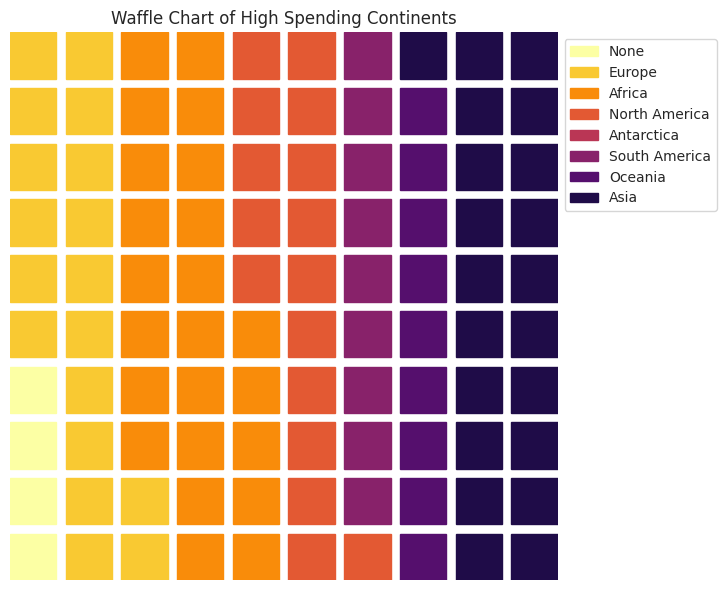

In [ ]:
import matplotlib.pyplot as plt
from pywaffle import Waffle

labels = list(team_user_buying_df_stat.toPandas()["continent"])
sizes = list(team_user_buying_df_stat.toPandas()["Percent"])

# Set up the data
data = dict(zip(labels, sizes))

# Create the waffle chart
fig = plt.figure(
    FigureClass=Waffle,
    rows=10,  # Specify the number of rows for the chart
    values=data,  # Pass the data
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},  # Add a legend
    colors=colors,  # Set the colors
    figsize=(10, 6)  # Set the size of the figure
)

# Add a title
plt.title('Waffle Chart of High Spending Continents')

plt.show()

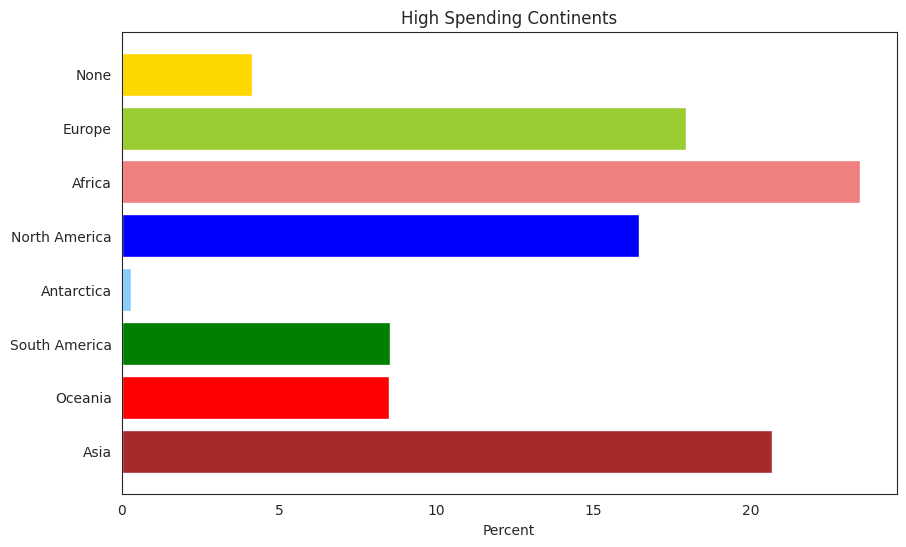

In [ ]:
import matplotlib.pyplot as plt

labels = list(team_user_buying_df_stat.toPandas()["continent"])
sizes = list(team_user_buying_df_stat.toPandas()["Percent"])
colors = ['gold', 'yellowgreen', 'lightcoral', 'blue', 'lightskyblue', 'green', 'red', "brown"]

# Set up the data
data = dict(zip(labels, sizes))

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Calculate the positions for each bar
positions = list(range(len(labels)))

# Plot the bars
ax.barh(positions, sizes, color=colors)

# Set the y-axis tick positions and labels
ax.set_yticks(positions)
ax.set_yticklabels(labels)

# Set the x-axis label
ax.set_xlabel('Percent')

# Add a title
ax.set_title('High Spending Continents')

# Invert the y-axis to display the largest bar on top
ax.invert_yaxis()

plt.show()

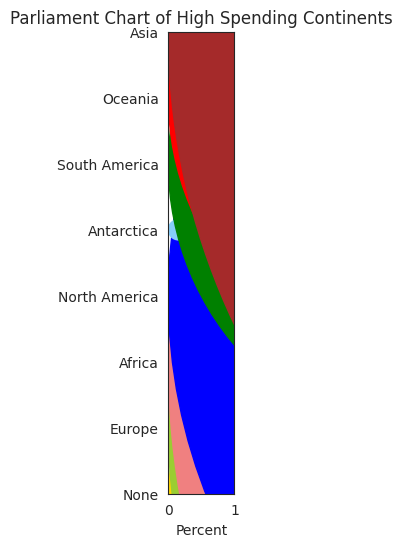

In [ ]:
import matplotlib.pyplot as plt

labels = list(team_user_buying_df_stat.toPandas()["continent"])
sizes = list(team_user_buying_df_stat.toPandas()["Percent"])
colors = ['gold', 'yellowgreen', 'lightcoral', 'blue', 'lightskyblue', 'green', 'red', "brown"]

# Set up the data
data = dict(zip(labels, sizes))

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Calculate the positions for each circle
positions = list(range(len(labels)))

# Plot the circles
for pos, size, color in zip(positions, sizes, colors):
    circle = plt.Circle((size / 2, pos), size / 2, color=color)
    ax.add_artist(circle)

# Set the y-axis tick positions and labels
ax.set_yticks(positions)
ax.set_yticklabels(labels)

# Set the x-axis label
ax.set_xlabel('Percent')

# Add a title
ax.set_title('Parliament Chart of High Spending Continents')

# Set the aspect ratio to 'equal' to make circles circular
ax.set_aspect('equal')

plt.show()

In [ ]:
# TEAM SPENDING AND TEAM RANK CORR

#team_user_buying_df.show()
team_user_buying_df.stat.corr("price","currentLevel")

nan

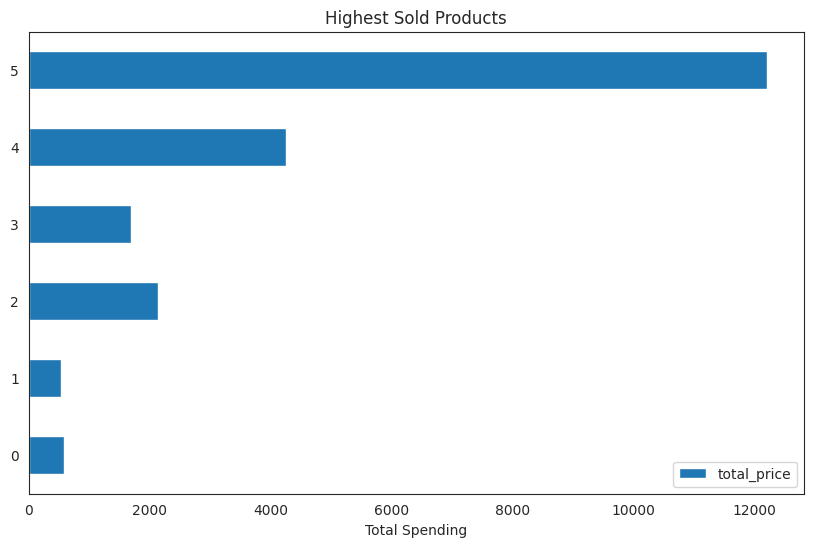

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

item_purchases_stat_df = buy_clicks_df.groupby("buyId").agg(sum(col("price")).alias("total_price")).orderBy("buyId").toPandas()

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Create the stacked bar chart
item_purchases_stat_df.plot.barh(y='total_price', ax=ax, stacked=True)

# Set the y-axis tick labels
ax.set_yticklabels(item_purchases_stat_df['buyId'])

# Set the x-axis label
ax.set_xlabel('Total Spending')

# Set the title
ax.set_title('Highest Sold Products')

plt.show()

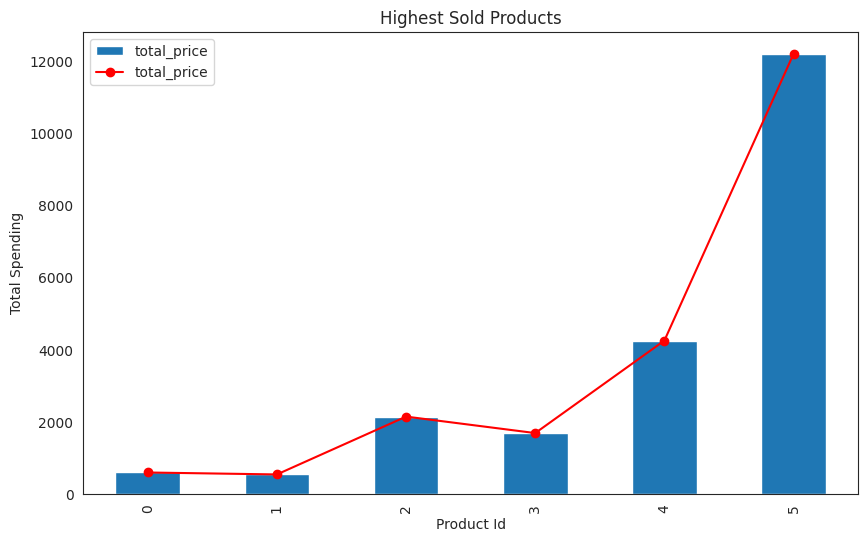

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

item_purchases_stat_df = buy_clicks_df.groupby("buyId").agg(sum(col("price")).alias("total_price")).orderBy("buyId").toPandas()

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Create the bar chart
item_purchases_stat_df.plot.bar(x='buyId', y='total_price', ax=ax)

# Create the line plot
item_purchases_stat_df.plot.line(x='buyId', y='total_price', ax=ax, color='red', marker='o')

# Set the x-axis label
ax.set_xlabel('Product Id')

# Set the y-axis label
ax.set_ylabel('Total Spending')

# Set the title
ax.set_title('Highest Sold Products')

# Rotate the x-axis tick labels
plt.xticks(rotation=90)

plt.show()

+-------------------+----+-------------+------+------+----+-----------+
|          timestamp|txId|userSessionId|teamId|userId|adId| adCategory|
+-------------------+----+-------------+------+------+----+-----------+
|2016-05-26 15:13:22|5974|         5809|    27|   611|   2|electronics|
|2016-05-26 15:17:24|5976|         5705|    18|  1874|  21|     movies|
|2016-05-26 15:22:52|5978|         5791|    53|  2139|  25|  computers|
|2016-05-26 15:22:57|5973|         5756|    63|   212|  10|    fashion|
|2016-05-26 15:22:58|5980|         5920|     9|  1027|  20|   clothing|
|2016-05-26 15:27:19|5977|         5954|    77|   595|   4|      games|
|2016-05-26 15:28:51|5981|         5674|    54|   770|   6|     movies|
|2016-05-26 15:35:25|5975|         5919|    59|  2133|   3|electronics|
|2016-05-26 15:35:37|5979|         5945|    75|   253|   3|electronics|
|2016-05-26 15:36:38|5972|         5914|    78|  1821|  12|  computers|
|2016-05-26 15:38:42|6000|         5955|    64|  2009|  17|     

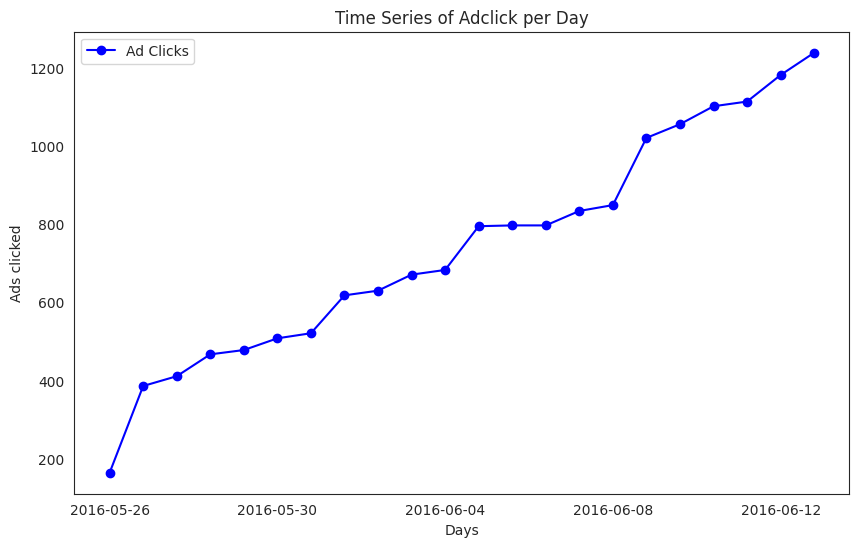

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

adclicks_df = spark.read.csv("ad-clicks.csv", header=True, inferSchema=True)

adclicks_df.show()

# Format the timestamp column in the DataFrame and group by the formatted date
df = adclicks_df.withColumn("tstamp", f.date_format(adclicks_df.timestamp, 'yyyy-MM-dd')) \
    .withColumn("hstamp", f.date_format(adclicks_df.timestamp, 'hh:mm:ss')) \
    .withColumn("month", f.date_format(adclicks_df.timestamp, 'yyyy-MM-dd')) \
    .select("month") \
    .groupBy("month") \
    .count() \
    .orderBy("count") \
    .toPandas()

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the line chart for count
df.plot.line(x="month", y="count", ax=ax, color='blue', marker='o', label='Ad Clicks')

# Customize the plot
ax.set_xlabel('Days')
ax.set_ylabel('Ads clicked')
ax.set_title('Time Series of Adclick per Day')

# Show the legend
ax.legend()

# Show the plot
plt.show()

In [ ]:
# DONUT PLOT
platform_usage_stats_df




import pandas as pd
import re


user_session_df = spark.read.csv("user-session.csv", header=True, inferSchema=True)


data = platform_usage_stats_df.toPandas()


import matplotlib.pyplot as plt


fig = plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')

# create donut plots
startingRadius = 0.7 + (0.3* (len(data)-1))
for index, row in data.iterrows():
    scenario = row["platformType"]
    percentage = row["Percent"]
    textLabel = scenario.capitalize() + ' ' + str(round(percentage,2)) + " %"
    print(startingRadius)
    #percentage = int(re.search(r'\d+', percentage).group())
    remainingPie = 100 - percentage

    donut_sizes = [remainingPie, percentage]

    plt.text(0.01, startingRadius - 0.197, textLabel, horizontalalignment='center', verticalalignment='center')
    plt.pie(donut_sizes, radius=startingRadius, startangle=90, colors=['#d5f6da', '#5cdb6f'],
            wedgeprops={"edgecolor": "white", 'linewidth': 1})

    startingRadius-=0.3



# equal ensures pie chart is drawn as a circle (equal aspect ratio)
plt.axis('equal')

# create circle and place onto pie chart
circle = plt.Circle(xy=(0, 0), radius=0.35, facecolor='white')
plt.gca().add_artist(circle)
plt.show()

NameError: ignored

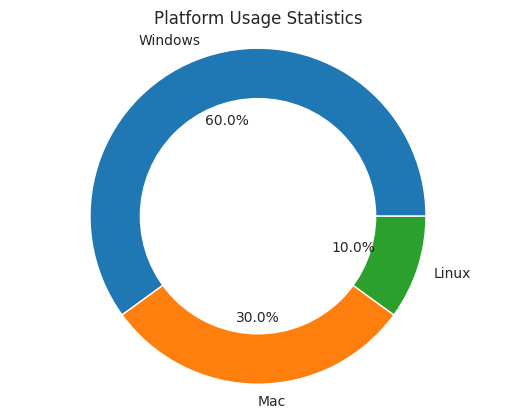

In [ ]:
import matplotlib.pyplot as plt

# Define the data for the donut plot
platforms = ['Windows', 'Mac', 'Linux']
usage_stats = [60, 30, 10]

# Create the donut plot
fig, ax = plt.subplots()
ax.pie(usage_stats, labels=platforms, autopct='%1.1f%%')

# Add a circle at the center to create a donut
center_circle = plt.Circle((0, 0), 0.7, fc='white')
fig.gca().add_artist(center_circle)

# Set the title
ax.set_title('Platform Usage Statistics')

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

# Display the plot
plt.show()


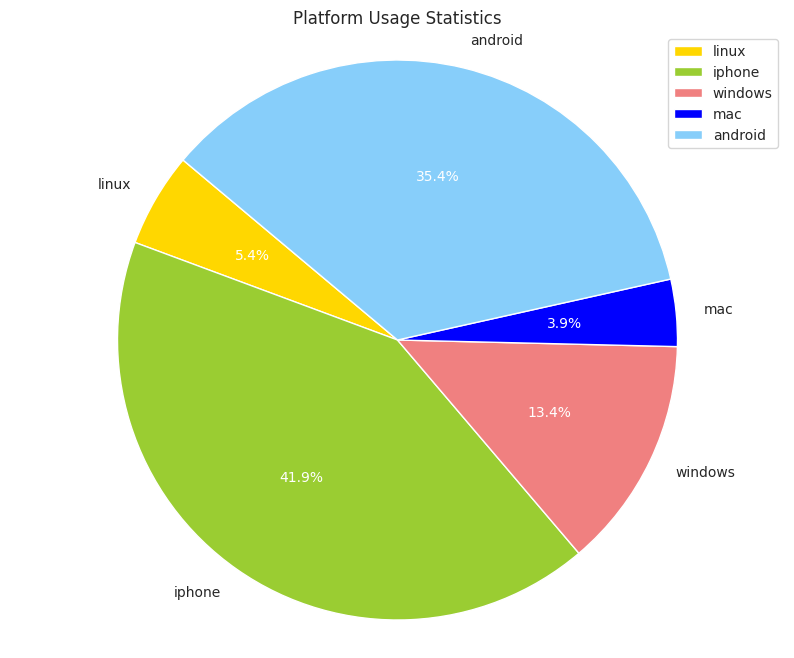

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

user_session_df = spark.read.csv("user-session.csv", header=True, inferSchema=True)
platform_usage_stats_df = user_session_df.groupBy("platformType").agg(f.mean("teamLevel").alias("average_rank"), 
                                            f.count("platformType").alias("total_platform_count")).orderBy("average_rank")

labels = list(platform_usage_stats_df.toPandas()["platformType"])
sizes = list(platform_usage_stats_df.toPandas()["total_platform_count"])
colors = ['gold', 'yellowgreen', 'lightcoral', 'blue', 'lightskyblue', 'green', 'red', "brown"]

fig, ax = plt.subplots(figsize=(10, 8))

# Create the pie chart
_, _, autopcts = ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Add percentage labels to the chart
for autopct in autopcts:
    autopct.set_color('white')

# Set title and remove unnecessary legend
ax.set_title('Platform Usage Statistics')
ax.legend(labels, loc="best")

plt.axis('equal')
plt.show()

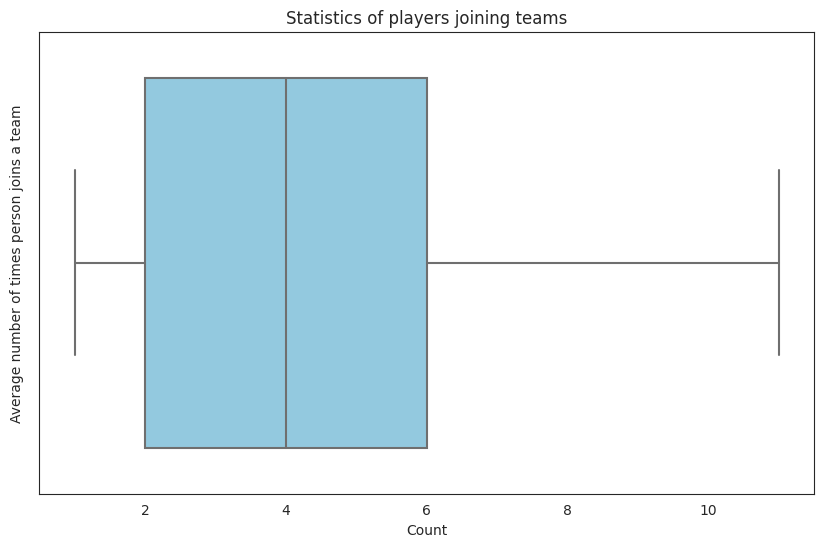

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

team_assignments = spark.read.csv("team-assignments.csv", header=True, inferSchema=True)
team_assignment_stats_df = team_assignments.groupBy("userId").agg(f.count("userId").alias("count")).select("count","userId").orderBy("count")

x = team_assignment_stats_df.select("count").toPandas()

plt.figure(figsize=(10, 6))
sns.boxplot(x=x['count'], orient='h', color='skyblue')
plt.xlabel('Count')
plt.ylabel('Average number of times person joins a team')
plt.title('Statistics of players joining teams')

plt.show()

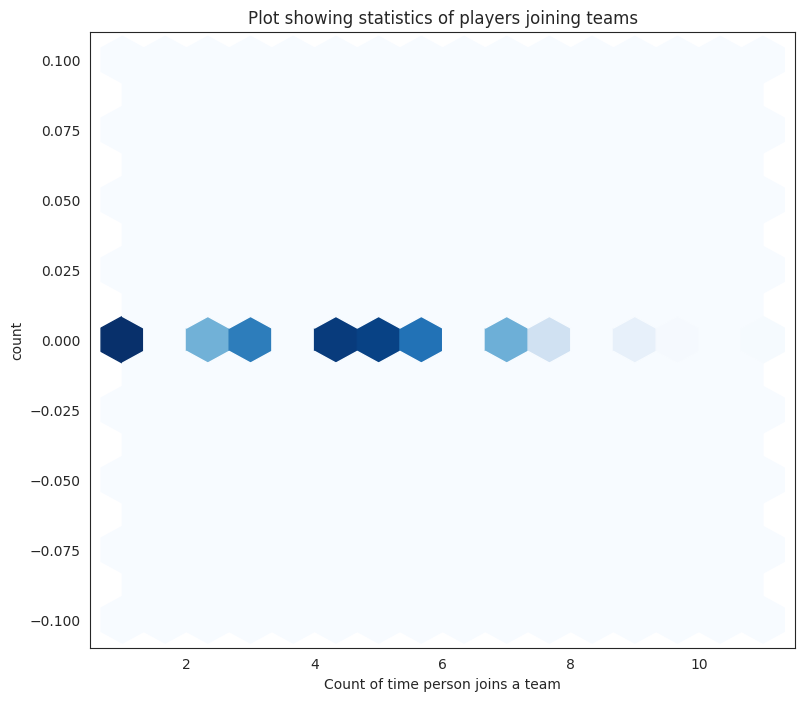

In [ ]:
team_assigments = spark.read.csv("team-assignments.csv", header=True, inferSchema=True)

team_assigment_stats_df = team_assigments.groupBy("userId").agg(f.count("userId").alias("count")).select("count","userId").orderBy("count")
x = team_assigment_stats_df.select("count").toPandas()

fig = plt.figure(figsize=(20, 8))

# Hexbin Plot
ax2 = fig.add_subplot(1, 2, 2)
ax2.hexbin(x=x["count"], y=[0]*len(x), gridsize=15, cmap='Blues')
ax2.set(xlabel='Count of time person joins a team', ylabel='count', 
       title="Plot showing statistics of players joining teams")

plt.show()

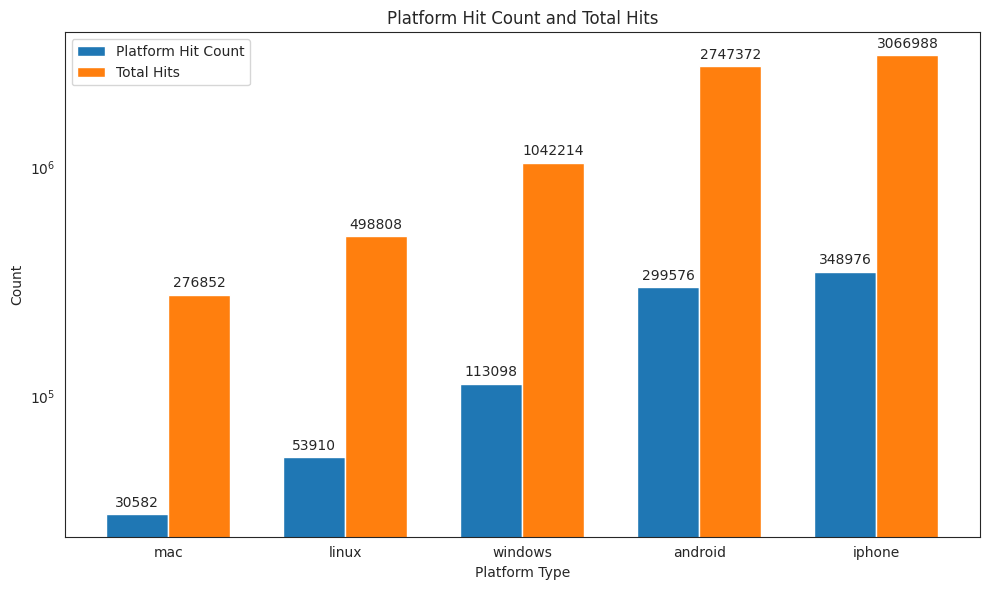

+------------+------------------+----------+-------------------+
|platformType|platform_hit_count|total_hits|         percentage|
+------------+------------------+----------+-------------------+
|         mac|             30582|    276852|0.11046335226041351|
|       linux|             53910|    498808| 0.1080776571346089|
|     windows|            113098|   1042214|0.10851706079557558|
|     android|            299576|   2747372|0.10904093075127795|
|      iphone|            348976|   3066988|0.11378459909200818|
+------------+------------------+----------+-------------------+



In [ ]:
import matplotlib.pyplot as plt
import numpy as np

game_clicks_df = spark.read.csv("game-clicks.csv", header=True, inferSchema=True)
user_session_df = spark.read.csv("user-session.csv", header=True, inferSchema=True)

game_clicks_user_session_df = game_clicks_df.alias("game_clicks_df").join(user_session_df.alias("user_session_df"), 
                                            f.col("game_clicks_df.userid") == f.col("user_session_df.userId"), "inner")

game_clicks_user_session_pf_df = game_clicks_user_session_df.groupby("platformType")\
                  .agg(f.sum(f.when(f.col("isHit") == 1, 1).otherwise(0)).alias("platform_hit_count"),
                       f.count("isHit").alias("total_hits"))\
                  .withColumn("percentage", f.col("platform_hit_count") / f.col("total_hits"))\
                  .orderBy("platform_hit_count")

# Convert the platformType column to a list
ylabels = list(game_clicks_user_session_pf_df.toPandas()["platformType"])

# Create a list of x positions for the bar groups
x = np.arange(len(ylabels))

# Get the data for platform_hit_count and total_hits as separate arrays
platform_hit_count = game_clicks_user_session_pf_df.toPandas()["platform_hit_count"]
total_hits = game_clicks_user_session_pf_df.toPandas()["total_hits"]

# Set the width of the bars
bar_width = 0.35

# Create the grouped bar graph
fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - bar_width/2, platform_hit_count, bar_width, label='Platform Hit Count')
rects2 = ax.bar(x + bar_width/2, total_hits, bar_width, label='Total Hits')

ax.set_xlabel('Platform Type')
ax.set_ylabel('Count')
ax.set_title('Platform Hit Count and Total Hits')
ax.set_xticks(x)
ax.set_xticklabels(ylabels)
ax.set_yscale('log')
ax.legend()

# Add labels to the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{int(height)}', xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()

game_clicks_user_session_pf_df.show()


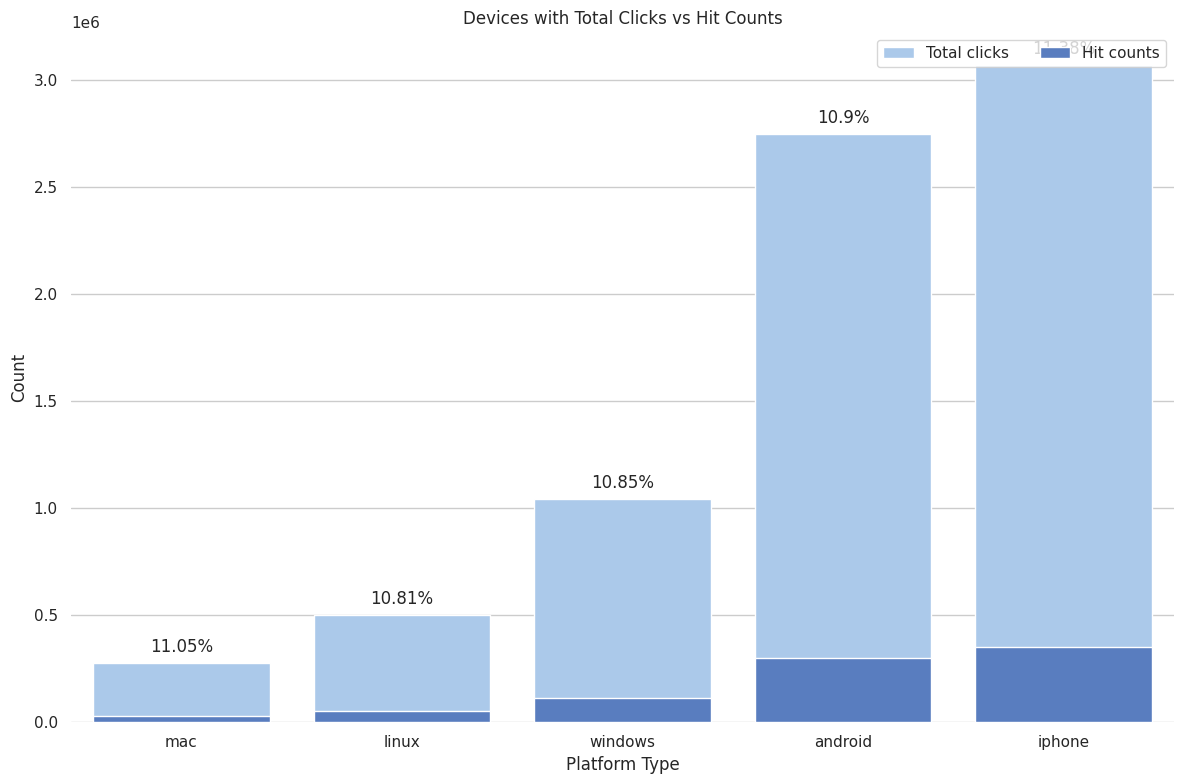

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(12, 8))

# Load the data
crashes = game_clicks_user_session_pf_df.toPandas()

# Plot the total clicks
sns.set_color_codes("pastel")
sns.barplot(x="platformType", y="total_hits", data=crashes,
            label="Total clicks", color="b")

# Add percentage labels
for bar, percentage in zip(ax.patches, crashes['percentage'].values):
    ax.annotate(f'{round(float(percentage) * 100, 2)}%', xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                xytext=(0, 5), textcoords='offset points', ha="center", va="bottom")

# Plot the hit counts
sns.set_color_codes("muted")
sns.barplot(x="platformType", y="platform_hit_count", data=crashes,
            label="Hit counts", color="b")

# Add legend and labels
ax.legend(ncol=2, loc="upper right", frameon=True)
ax.set(xlabel="Platform Type", ylabel="Count",
       title="Devices with Total Clicks vs Hit Counts")
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

In [ ]:
#CORR
from pyspark.sql import functions as f

team_df = spark.read.csv("team.csv", header=True, inferSchema=True)
buyclicks_df = spark.read.csv("buy-clicks.csv", header=True, inferSchema=True)


team_buying_df = team_df.alias("teamdf").join(buyclicks_df.alias("buyclicks"),\
                            f.col("teamdf.teamId") == f.col("buyclicks.team"),"inner")

# HISTOGRAM OF SPENDING COUNT HOW MUCH SPENDING IS DISTRIBUTED && CORRELATION

# team_buying_df.groupBy("teamId").sum("price", "strength").orderBy("sum(price)").toPandas().hist(column = "sum(price)")


team_buying_df_grouped = team_buying_df.groupBy("teamId").sum("price", "strength")\
         .select('teamId', f.col('sum(price)').alias('total_spending'), f.col('sum(strength)').alias('total_strength'))\
         .orderBy("sum(price)")

team_buying_df.stat.corr("price","strength")
# team_buying_df_grouped.show()

-0.06938790495270436

In [ ]:
# CLUSTERING ANALYSIS

# Utility functions for Spark Cluster Analysis Hands-On

from itertools import cycle, islice
from math import sqrt
from numpy import array
from pandas.plotting import parallel_coordinates
from pyspark.ml.clustering import KMeans as KM
from pyspark.mllib.linalg import DenseVector
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def computeCost(featuresAndPrediction, model):
    allClusterCenters = [DenseVector(c) for c in model.clusterCenters()]
    arrayCollection   = featuresAndPrediction.rdd.map(array)

    def error(point, predictedCluster):
        center = allClusterCenters[predictedCluster]
        z      = point - center
        return sqrt((z*z).sum())
    
    return arrayCollection.map(lambda row: error(row[0], row[1])).reduce(lambda x, y: x + y)


def elbow(elbowset, clusters):
	wsseList = []	
	for k in clusters:
		print("Training for cluster size {} ".format(k))
		kmeans = KM(k = k, seed = 1)
		model = kmeans.fit(elbowset)
		transformed = model.transform(elbowset)
		featuresAndPrediction = transformed.select("features", "prediction")

		W = computeCost(featuresAndPrediction, model)
		print("......................WSSE = {} ".format(W))

		wsseList.append(W)
	return wsseList

def elbow_plot(wsseList, clusters):
	wsseDF = pd.DataFrame({'WSSE' : wsseList, 'k' : clusters })
	wsseDF.plot(y='WSSE', x='k', figsize=(15,10), grid=True, marker='o')

def pd_centers(featuresUsed, centers):
	colNames = list(featuresUsed)
	colNames.append('prediction')

	# Zip with a column called 'prediction' (index)
	Z = [np.append(A, index) for index, A in enumerate(centers)]

	# Convert to pandas for plotting
	P = pd.DataFrame(Z, columns=colNames)
	P['prediction'] = P['prediction'].astype(int)
	return P

def parallel_plot(data, P):
	my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(P)))
	plt.figure(figsize=(15,8)).gca().axes.set_ylim([-3,+3])
	parallel_coordinates(data, 'prediction', color = my_colors, marker='o')



In [ ]:
df = spark.read.csv("combined-data.csv", header=True, inferSchema=True)

df

DataFrame[userId: int, userSessionId: int, teamLevel: int, platformType: string, count_gameclicks: int, count_hits: int, count_buyId: string, avg_price: string]

In [ ]:
df.count()
df.na.drop().count()

4619

In [ ]:
df.columns

['userId',
 'userSessionId',
 'teamLevel',
 'platformType',
 'count_gameclicks',
 'count_hits',
 'count_buyId',
 'avg_price']

In [ ]:
# K-MEANS CLUSTERING
ad_click_df = spark.read.csv("ad-clicks.csv", header=True, inferSchema=True)
buy_click_df = spark.read.csv("buy-clicks.csv", header=True, inferSchema=True)
game_click_df = spark.read.csv("game-clicks.csv", header=True, inferSchema=True)
level_events_df = spark.read.csv("level-events.csv", header=True, inferSchema=True)
team_assignments_df = spark.read.csv("team-assignments.csv", header=True, inferSchema=True)
team_df = spark.read.csv("team.csv", header=True, inferSchema=True)
users_df = spark.read.csv("users.csv", header=True, inferSchema=True)
users_session_df = spark.read.csv("user-session.csv", header=True, inferSchema=True)

In [ ]:
# JOIN ALL TABLES

whole_dataset_df = team_assignments_df.alias("team_assignment_df").join(users_df.alias("users_df"),\
                           f.col("team_assignment_df.userId") == f.col("users_df.userId"),"inner")\
                           .join(team_df.alias("team_df"), f.col("team_df.teamId") == f.col("team"))\
                           .join(users_session_df.alias("users_session_df"), f.col("users_session_df.userId") == f.col("users_df.userId"))\
                           .join(game_click_df.alias("game_click_df"), f.col("game_click_df.userId") == f.col("users_df.userId"))\
                           .join(ad_click_df.alias("ad_click_df"), f.col("ad_click_df.userId") == f.col("users_df.userId"))\
                           .join(buy_click_df.alias("buy_click_df"), f.col("buy_click_df.userId") == f.col("users_df.userId"))\
                           .select("team_assignment_df.timestamp", "team_assignment_df.timestamp", 
                                   "users_df.userId", "users_df.nick", "users_df.twitter","users_df.country","users_df.dob",
                                   "team_df.teamId","team_df.teamCreationTime", "team_df.teamEndTime", "team_df.strength","team_df.currentLevel",
                                   "users_session_df.timestamp","users_session_df.timestamp", "users_session_df.sessionType","users_session_df.teamLevel","users_session_df.platformType",
                                   "game_click_df.timestamp", "game_click_df.isHit",
                                   "ad_click_df.adId", "ad_click_df.adCategory",
                                   "buy_click_df.txId","buy_click_df.price")\
                          

In [ ]:
whole_dataset_df = whole_dataset_df.select('strength',
 'teamLevel',
 'isHit',
 'price').distinct()

In [ ]:
# CLASSIFICATION AND CLUSTERING ANALYSIS
import pyspark.sql.functions as f
from pyspark.sql import Window
from pyspark.sql.functions import rank,sum,col


window = Window.rowsBetween(Window.unboundedPreceding,Window.unboundedFollowing)


combined_data_df = spark.read.csv("/content/combined-data.csv", header=True, inferSchema=True)

combined_data_df_na_removed = combined_data_df.na.drop()
# combined_data_df_hitter = combined_data_df.withColumn('Percent',f.col('count_hits')*100/f.col('count_gameclicks'))\
#                           .withColumn("hitter", f.when(f.col("Percent") > 10, 1).otherwise(0))\
#                           .withColumn('total',sum(f.col('avg_price')).over(window))\
#                           .withColumn("spender", f.when(f.col("avg_price") > 5,1).otherwise(0))

                          
combined_data_df_hitter = combined_data_df\
                          .withColumn('total',sum(f.col('avg_price')).over(window))\
                          .withColumn("spender", f.when(f.col("avg_price") > 5,1).otherwise(0))





grouped_userId_combined_data_df  = combined_data_df_hitter.groupby("userId")\
                                  .agg(f.sum("count_gameclicks").alias('count_gameclicks_total'), 
                                       f.sum("count_hits").alias("count_hits_total"), 
                                       f.sum("avg_price").alias("avg_price_total"))\
                                  .withColumn('Percent',f.col('count_hits_total')*100/f.col('count_gameclicks_total'))\
                                  .withColumn("hitter", f.when(f.col("Percent") > 10, 1).otherwise(0))\
                                  


combined_grouped_df = combined_data_df_hitter.alias("combined_data_df_hitter").join(grouped_userId_combined_data_df.alias("grouped_userId_combined_data_df"),\
                           f.col("combined_data_df_hitter.userId") == f.col("grouped_userId_combined_data_df.userId"),"inner")\

                          
combined_grouped_df.show()

+------+-------------+---------+------------+----------------+----------+-----------+---------+------------------+-------+------+----------------------+----------------+---------------+------------------+------+
|userId|userSessionId|teamLevel|platformType|count_gameclicks|count_hits|count_buyId|avg_price|             total|spender|userId|count_gameclicks_total|count_hits_total|avg_price_total|           Percent|hitter|
+------+-------------+---------+------------+----------------+----------+-----------+---------+------------------+-------+------+----------------------+----------------+---------------+------------------+------+
|   812|         5648|        1|     android|              69|         8|       NULL|     NULL|10179.410000000002|      0|   812|                   669|              74|           null|11.061285500747385|     1|
|  1658|         5649|        1|      iphone|              31|         5|       NULL|     NULL|10179.410000000002|      0|  1658|                   403|

In [ ]:
# INDEX THE PLATFORMTYPE CATEGORICAL COLUMN

from pyspark.ml.feature import StringIndexer

# Create an indexer
indexer = StringIndexer(inputCol='platformType', outputCol='platformType_indexed')

# Indexer identifies categories in the data
indexer_model = indexer.fit(combined_grouped_df)

# Indexer creates a new column with numeric index values
combined_grouped_df_indexed = indexer_model.transform(combined_grouped_df)
combined_grouped_df_indexed.show()



+------+-------------+---------+------------+----------------+----------+-----------+---------+------------------+-------+------+----------------------+----------------+---------------+------------------+------+--------------------+
|userId|userSessionId|teamLevel|platformType|count_gameclicks|count_hits|count_buyId|avg_price|             total|spender|userId|count_gameclicks_total|count_hits_total|avg_price_total|           Percent|hitter|platformType_indexed|
+------+-------------+---------+------------+----------------+----------+-----------+---------+------------------+-------+------+----------------------+----------------+---------------+------------------+------+--------------------+
|   812|         5648|        1|     android|              69|         8|       NULL|     NULL|10179.410000000002|      0|   812|                   669|              74|           null|11.061285500747385|     1|                 1.0|
|  1658|         5649|        1|      iphone|              31|      

In [ ]:
# FILL NA IN AVG PRICE WITH 0 


combined_grouped_df_indexed = combined_grouped_df_indexed.fillna({'avg_price_total':'0'})

combined_grouped_df_indexed.show()

+------+-------------+---------+------------+----------------+----------+-----------+---------+------------------+-------+------+----------------------+----------------+---------------+------------------+------+--------------------+
|userId|userSessionId|teamLevel|platformType|count_gameclicks|count_hits|count_buyId|avg_price|             total|spender|userId|count_gameclicks_total|count_hits_total|avg_price_total|           Percent|hitter|platformType_indexed|
+------+-------------+---------+------------+----------------+----------+-----------+---------+------------------+-------+------+----------------------+----------------+---------------+------------------+------+--------------------+
|   812|         5648|        1|     android|              69|         8|       NULL|     NULL|10179.410000000002|      0|   812|                   669|              74|            0.0|11.061285500747385|     1|                 1.0|
|  1658|         5649|        1|      iphone|              31|      

In [ ]:
# FEATURE VECTORIZATION

from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StandardScaler
featuresUsed = ['Percent',
 'teamLevel',
"count_gameclicks_total",
"count_hits_total",
"platformType_indexed"
 ]



assembler = VectorAssembler(inputCols=featuresUsed,  outputCol='features')
assembled = assembler.transform(combined_grouped_df_indexed)

# Split into training and test sets in a 80:20 ratio
combined_grouped_data_train, combined_grouped_data_test = assembled.randomSplit([0.8, 0.2], seed=17)

combined_grouped_data_train.show()


+------+-------------+---------+------------+----------------+----------+-----------+---------+------------------+-------+------+----------------------+----------------+---------------+------------------+------+--------------------+--------------------+
|userId|userSessionId|teamLevel|platformType|count_gameclicks|count_hits|count_buyId|avg_price|             total|spender|userId|count_gameclicks_total|count_hits_total|avg_price_total|           Percent|hitter|platformType_indexed|            features|
+------+-------------+---------+------------+----------------+----------+-----------+---------+------------------+-------+------+----------------------+----------------+---------------+------------------+------+--------------------+--------------------+
|     0|        24943|        2|      iphone|             353|        35|       NULL|     NULL|10179.410000000002|      0|     0|                  1240|             124|            0.0|              10.0|     0|                 0.0|[10.0,

In [ ]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
silhouette_score=[]
evaluator = ClusteringEvaluator(predictionCol='prediction', featuresCol='features', \
                                metricName='silhouette', distanceMeasure='squaredEuclidean')
for i in range(2,10):
    KMeans_algo=KMeans(featuresCol='features', k=i)
    KMeans_fit=KMeans_algo.fit(combined_grouped_data_train)
    output=KMeans_fit.transform(combined_grouped_data_train)
    score=evaluator.evaluate(output)
    silhouette_score.append(score)
    print("Silhouette Score:",score)

Silhouette Score: 0.8826632454216913
Silhouette Score: 0.8180764071592836
Silhouette Score: 0.7168636248140007
Silhouette Score: 0.7259475589964668
Silhouette Score: 0.7240016528328049
Silhouette Score: 0.6867664882130241
Silhouette Score: 0.6841562324174006
Silhouette Score: 0.6831747647018742


Text(0, 0.5, 'cost')

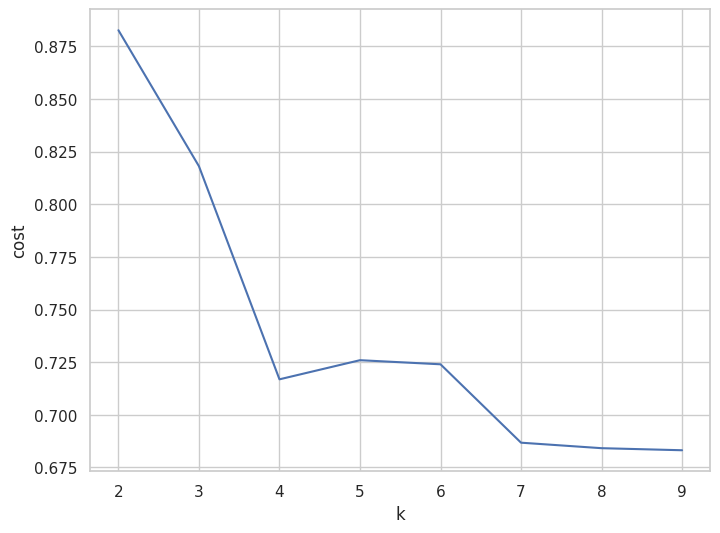

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1, figsize =(8,6))
ax.plot(range(2,10),silhouette_score)
ax.set_xlabel('k')
ax.set_ylabel('cost')

In [ ]:
final_clustering=KMeans(featuresCol='standardized', k=3)
KMeans_fit=KMeans_algo.fit(combined_grouped_data_test)
clusters_output=KMeans_fit.transform(combined_grouped_data_test)
clusters_output.show()

+------+-------------+---------+------------+----------------+----------+-----------+---------+------------------+-------+------+----------------------+----------------+---------------+------------------+------+--------------------+--------------------+----------+
|userId|userSessionId|teamLevel|platformType|count_gameclicks|count_hits|count_buyId|avg_price|             total|spender|userId|count_gameclicks_total|count_hits_total|avg_price_total|           Percent|hitter|platformType_indexed|            features|prediction|
+------+-------------+---------+------------+----------------+----------+-----------+---------+------------------+-------+------+----------------------+----------------+---------------+------------------+------+--------------------+--------------------+----------+
|     0|        23473|        1|      iphone|             237|        28|       NULL|     NULL|10179.410000000002|      0|     0|                  1240|             124|            0.0|              10.0| 

In [ ]:
from logging import Handler
# PLOT K MEANS
import numpy as np 
import matplotlib.pyplot as plt

df = clusters_output.toPandas()
label = df.prediction.tolist()

u_labels = np.unique(label)

filtereddf = df[df['prediction'] == 1]

plt.rcParams["figure.figsize"]=(14,8)
plt.rcParams['legend.fontsize'] = 10
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(df.avg_price_total, df.count_hits_total, df.teamLevel  , c=df.prediction, s =150,cmap='rainbow')


scatter = ax.scatter(df.avg_price_total, df.count_hits_total, df.teamLevel, c=df.prediction, s =150,cmap='rainbow')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper left", title="Classes")
ax.add_artist(legend1)

ax.legend(loc = 'upper left')

ax.set_xlabel('Price Total',fontsize=20,labelpad=10)
ax.set_ylabel('Total Hit Counts', fontsize=20, rotation=150,labelpad=10)
ax.set_zlabel('Team Level', fontsize=20, rotation=60,labelpad=15)

Text(0.5, 0, 'Team Level')

<Figure size 1400x800 with 0 Axes>

In [ ]:
clusters_output.show()

+------+-------------+---------+------------+----------------+----------+-----------+---------+------------------+-------+------+----------------------+----------------+---------------+------------------+------+--------------------+--------------------+----------+
|userId|userSessionId|teamLevel|platformType|count_gameclicks|count_hits|count_buyId|avg_price|             total|spender|userId|count_gameclicks_total|count_hits_total|avg_price_total|           Percent|hitter|platformType_indexed|            features|prediction|
+------+-------------+---------+------------+----------------+----------+-----------+---------+------------------+-------+------+----------------------+----------------+---------------+------------------+------+--------------------+--------------------+----------+
|     0|        23473|        1|      iphone|             237|        28|       NULL|     NULL|10179.410000000002|      0|     0|                  1240|             124|            0.0|              10.0| 

In [ ]:
combined_grouped_df_indexed.show()

+------+-------------+---------+------------+----------------+----------+-----------+---------+------------------+-------+------+----------------------+----------------+---------------+------------------+------+--------------------+
|userId|userSessionId|teamLevel|platformType|count_gameclicks|count_hits|count_buyId|avg_price|             total|spender|userId|count_gameclicks_total|count_hits_total|avg_price_total|           Percent|hitter|platformType_indexed|
+------+-------------+---------+------------+----------------+----------+-----------+---------+------------------+-------+------+----------------------+----------------+---------------+------------------+------+--------------------+
|   812|         5648|        1|     android|              69|         8|       NULL|     NULL|10179.410000000002|      0|   812|                   669|              74|            0.0|11.061285500747385|     1|                 1.0|
|  1658|         5649|        1|      iphone|              31|      

Training for cluster size 2 
......................WSSE = 9897.832947236197 
Training for cluster size 3 
......................WSSE = 9052.35131149152 
Training for cluster size 4 
......................WSSE = 7804.294332262038 
Training for cluster size 5 
......................WSSE = 7402.3832302379515 
Training for cluster size 6 
......................WSSE = 7048.319723977783 
Training for cluster size 7 
......................WSSE = 7011.454831986224 
Training for cluster size 8 
......................WSSE = 6648.859149339848 
Training for cluster size 9 
......................WSSE = 6363.240529222316 
Training for cluster size 10 
......................WSSE = 5828.245776956924 
Training for cluster size 11 
......................WSSE = 5822.26276530395 
Training for cluster size 12 
......................WSSE = 5596.8897051554895 
Training for cluster size 13 
......................WSSE = 5466.591940879645 
Training for cluster size 14 
......................WSSE = 5379.90736097

,platformType_indexed,teamLevel,hitter,spender,count_gameclicks_total,avg_price_total,count_hits_total,prediction
0,-0.159078,-0.036365,0.560036,-0.372151,-0.217321,-0.160085,-0.179910,0
1,0.147503,-0.453602,0.287198,-0.137452,2.530351,-0.054809,2.514082,1
2,2.360239,0.004245,-0.201248,-0.292081,-0.246001,-0.399195,-0.261021,2
3,-0.751559,0.301983,0.390343,2.561660,-0.209781,1.790676,-0.104333,3
4,-0.195034,0.118900,-1.785211,-0.358450,-0.328588,-0.454844,-0.479037,4


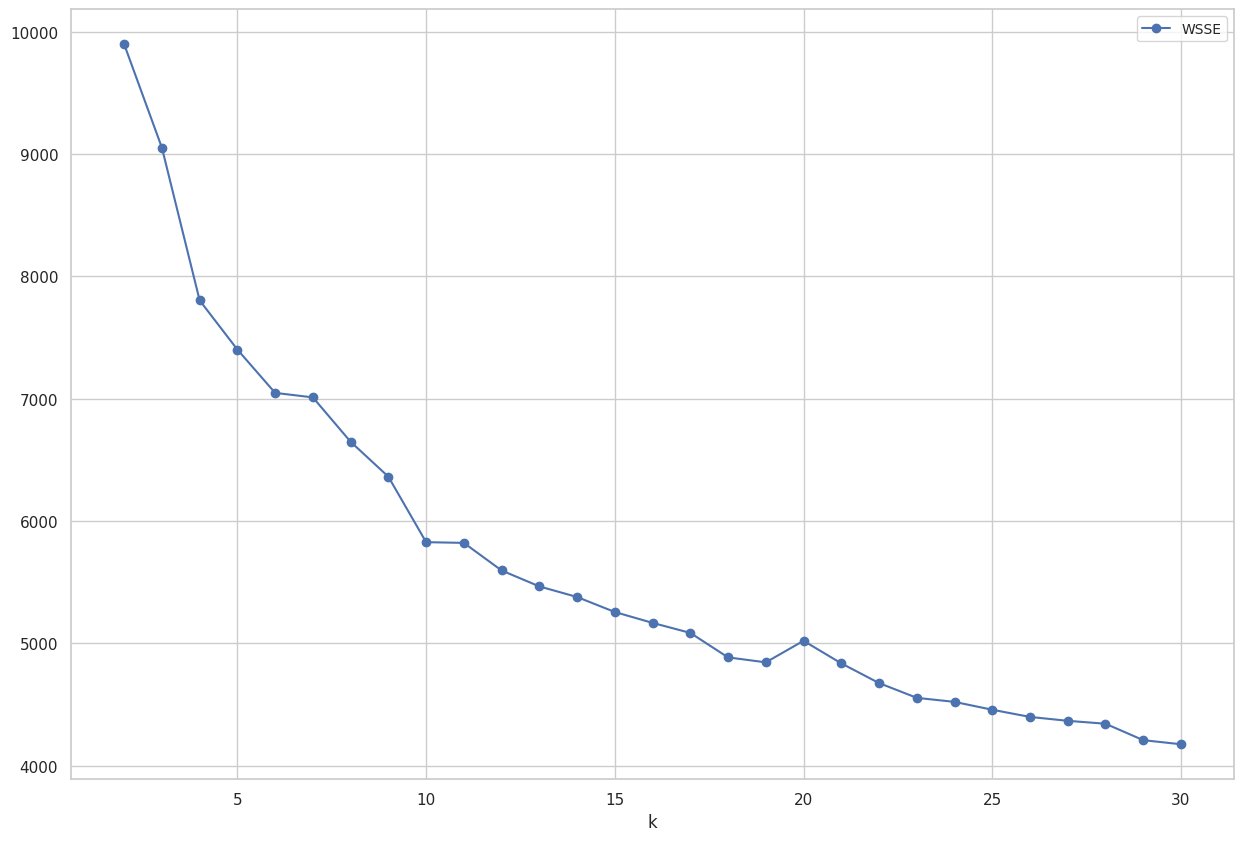

In [ ]:
# KMEANS 
featuresUsed = ["platformType_indexed","teamLevel","hitter","spender", "count_gameclicks_total","avg_price_total","count_hits_total"]

# featuresUsed = ['count_gameclicks', 'count_hits' ]
from pyspark.ml.feature import VectorAssembler


assembler = VectorAssembler(inputCols=featuresUsed, outputCol="features_unscaled")
assembled_feature = assembler.transform(combined_grouped_df_indexed)


# SCALE THE DATA TO STANDARDIZE DIFFERENT UNITS
scaler = StandardScaler(inputCol="features_unscaled", outputCol="features", withStd=True, withMean=True)
scalerModel = scaler.fit(assembled_feature)
scaledData = scalerModel.transform(assembled_feature)



# assembled_feature.show()

elbowset = scaledData.select("features","platformType_indexed","count_gameclicks_total","avg_price_total","count_hits_total","teamLevel")
clusters = range(2,31)

wsseList = elbow(elbowset, clusters)


# PLOT ELBOW METHOD
elbow_plot(wsseList, clusters)



# SELECT FEATURE COLUMN
scaledDataFeat = scaledData.select("features","teamLevel", "platformType_indexed","count_gameclicks_total","avg_price_total","count_hits_total","spender","hitter")
scaledDataFeat.persist()


## TRAIN KMEANS MODEL WITH !2 CLusters
kmeans = KMeans(k=5, seed=1)
model = kmeans.fit(scaledDataFeat)
transformed = model.transform(scaledDataFeat)

# GET CENTERIODS
centers = model.clusterCenters()
centers


P = pd_centers(featuresUsed, centers)

P.head()

In [ ]:
transformed.show()
centers

+--------------------+---------+--------------------+----------------------+---------------+----------------+-------+------+----------+
|            features|teamLevel|platformType_indexed|count_gameclicks_total|avg_price_total|count_hits_total|spender|hitter|prediction|
+--------------------+---------+--------------------+----------------------+---------------+----------------+-------+------+----------+
|[0.05614147219518...|        1|                 1.0|                   669|            0.0|              74|      0|     1|         0|
|[-0.8902726156499...|        1|                 0.0|                   403|           37.5|              58|      0|     1|         0|
|[-0.8902726156499...|        1|                 0.0|                   289|            0.0|              25|      0|     0|         4|
|[0.05614147219518...|        1|                 1.0|                   371|           13.0|              41|      0|     1|         0|
|[0.05614147219518...|        1|                

[array([-0.15907806, -0.03636503,  0.56003647, -0.37215053, -0.21732124,
        -0.1600847 , -0.17990985]),
 array([ 0.14750323, -0.45360234,  0.28719822, -0.13745186,  2.53035053,
        -0.0548085 ,  2.51408176]),
 array([ 2.3602386 ,  0.00424472, -0.20124819, -0.29208106, -0.24600105,
        -0.39919541, -0.26102093]),
 array([-0.75155886,  0.30198308,  0.3903432 ,  2.56166   , -0.20978065,
         1.79067607, -0.10433334]),
 array([-0.1950345 ,  0.11889969, -1.78521144, -0.35844995, -0.32858808,
        -0.45484407, -0.47903675])]

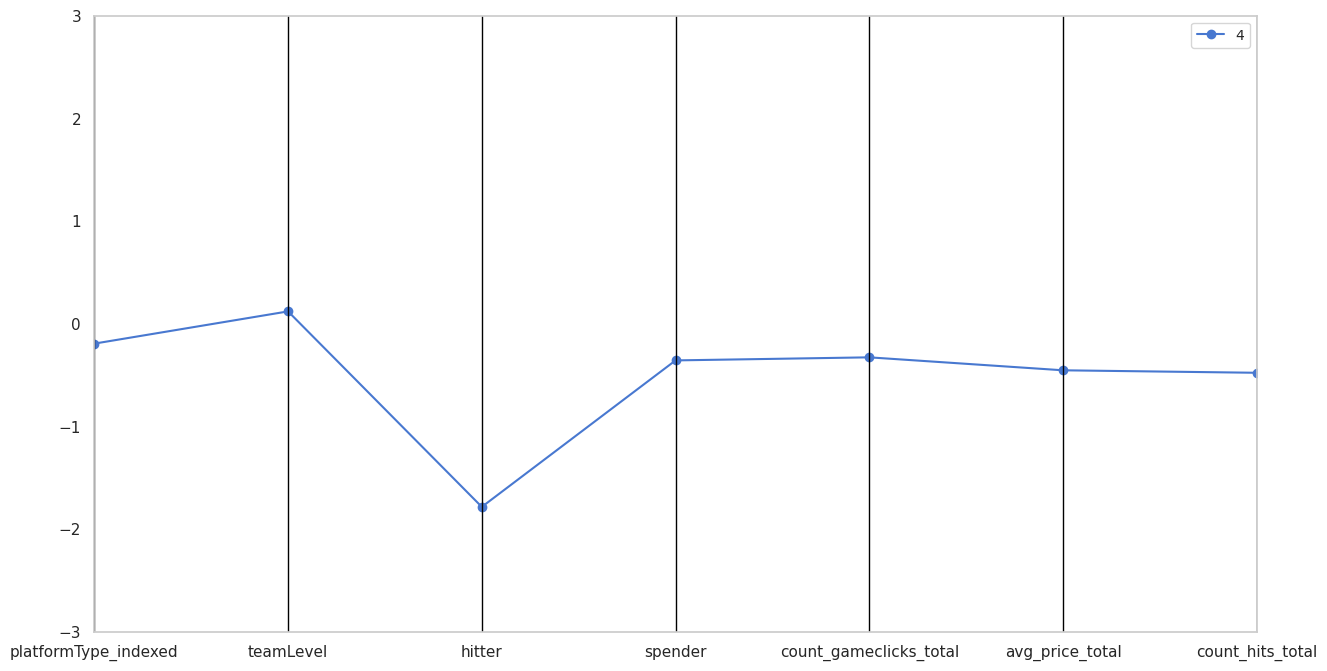

In [ ]:
parallel_plot(P[P['hitter'] < -0.5], P)

In [ ]:
from logging import Handler
# PLOT K MEANS
import numpy as np 
import matplotlib.pyplot as plt


df = transformed.toPandas()

label = df.prediction.tolist()

u_labels = np.unique(label)



filtereddf = df[df['prediction'] == 1]



plt.rcParams["figure.figsize"]=(14,8)
plt.rcParams['legend.fontsize'] = 10
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(df.avg_price_total, df.count_hits_total, df.platformType_indexed  , c=df.prediction, s =150,cmap='rainbow')


scatter = ax.scatter(df.avg_price_total, df.count_hits_total, df.platformType_indexed, c=df.prediction, s =150,cmap='rainbow')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper left", title="Classes")
ax.add_artist(legend1)

ax.legend(loc = 'upper left')

ax.set_xlabel('Price Total',fontsize=20,labelpad=10)
ax.set_ylabel('Total Hit Counts', fontsize=20, rotation=150,labelpad=10)
ax.set_zlabel('Team Level', fontsize=20, rotation=60,labelpad=15)

Text(0.5, 0, 'Team Level')

<Figure size 1400x800 with 0 Axes>

In [ ]:
from pyspark.ml.feature import VectorAssembler

# Create an assembler object
featuresUsed = ["avg_price_total",
 'teamLevel',
"platformType_indexed"
 ]



assembler = VectorAssembler(inputCols=featuresUsed,  outputCol='features')
assembled = assembler.transform(combined_grouped_df_indexed)


# assembled  = assembled.select(featuresUsed)
# Split into training and test sets in a 80:20 ratio
combined_grouped_data_train, combined_grouped_data_test = assembled.randomSplit([0.8, 0.2], seed=17)



# Check the resulting column
combined_grouped_data_train.show(5, truncate=False)




+------+-------------+---------+------------+----------------+----------+-----------+---------+------------------+-------+------+----------------------+----------------+---------------+-----------------+------+--------------------+-------------+
|userId|userSessionId|teamLevel|platformType|count_gameclicks|count_hits|count_buyId|avg_price|total             |spender|userId|count_gameclicks_total|count_hits_total|avg_price_total|Percent          |hitter|platformType_indexed|features     |
+------+-------------+---------+------------+----------------+----------+-----------+---------+------------------+-------+------+----------------------+----------------+---------------+-----------------+------+--------------------+-------------+
|0     |24943        |2        |iphone      |353             |35        |NULL       |NULL     |10179.410000000002|0      |0     |1240                  |124             |0.0            |10.0             |0     |0.0                 |[0.0,2.0,0.0]|
|0     |28377   

In [ ]:
# DECISION TREE FOR Hitter

from pyspark.ml.classification import DecisionTreeClassifier




# Create a classifier object and fit to the training data
tree = DecisionTreeClassifier(labelCol='hitter')
tree_model = tree.fit(combined_grouped_data_train)



# Create predictions for the testing data and take a look at the predictions
prediction = tree_model.transform(combined_grouped_data_test)
prediction.select("prediction","rawPrediction","probability", "hitter").show(5, False)

+----------+--------------+----------------------------------------+------+
|prediction|rawPrediction |probability                             |hitter|
+----------+--------------+----------------------------------------+------+
|1.0       |[601.0,1285.0]|[0.31866383881230115,0.6813361611876988]|0     |
|1.0       |[156.0,1218.0]|[0.11353711790393013,0.8864628820960698]|1     |
|1.0       |[601.0,1285.0]|[0.31866383881230115,0.6813361611876988]|0     |
|1.0       |[156.0,1218.0]|[0.11353711790393013,0.8864628820960698]|1     |
|1.0       |[156.0,1218.0]|[0.11353711790393013,0.8864628820960698]|1     |
+----------+--------------+----------------------------------------+------+
only showing top 5 rows



In [ ]:
!pip install pydotplus

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
tree_model.toDebugString

def parse_debug_string_lines(lines):
    
    block = []
    while lines:


        if lines[0].startswith('If'):
            bl = ' '.join(lines.pop(0).split()[1:]).replace('(', '').replace(')', '')
            block.append({'name': bl, 'children': parse_debug_string_lines(lines)})


            if lines[0].startswith('Else'):
                be = ' '.join(lines.pop(0).split()[1:]).replace('(', '').replace(')', '')
                block.append({'name': be, 'children': parse_debug_string_lines(lines)})
        elif not lines[0].startswith(('If', 'Else')):
            block2 = lines.pop(0)
            block.append({'name': block2})
        else:
            break
    
    return block


def debug_str_to_json(debug_string):
    data = []
    for line in debug_string.splitlines():
        if line.strip():
            line = line.strip()
            data.append(line)
        else:
            break
        if not line: break

    json = {'name': 'Root', 'children': parse_debug_string_lines(data[1:])}
    return json

import json

dict_tree_json = debug_str_to_json(tree_model.toDebugString)

print(json.dumps(dict_tree_json,indent = 1 ))

{
 "name": "Root",
 "children": [
  {
   "name": "feature 0 <= 8.165",
   "children": [
    {
     "name": "feature 0 <= 4.165",
     "children": [
      {
       "name": "feature 0 <= 2.165",
       "children": [
        {
         "name": "feature 0 <= 1.625",
         "children": [
          {
           "name": "Predict: 1.0"
          }
         ]
        },
        {
         "name": "feature 0 > 1.625",
         "children": [
          {
           "name": "feature 2 in {0.0,3.0}",
           "children": [
            {
             "name": "Predict: 0.0"
            }
           ]
          },
          {
           "name": "feature 2 not in {0.0,3.0}",
           "children": [
            {
             "name": "Predict: 1.0"
            }
           ]
          }
         ]
        }
       ]
      },
      {
       "name": "feature 0 > 2.165",
       "children": [
        {
         "name": "feature 2 in {0.0}",
         "children": [
          {
           "name": "Predict:

In [ ]:
f_type_to_flist_dict = prediction.schema['features'].metadata["ml_attr"]["attrs"]

f_index_to_name_dict = {}

for f_type, f_list in f_type_to_flist_dict.items():


    for f in f_list: 
      f_index = f['idx']
      f_name = f['name']
      f_index_to_name_dict[f_index] = f_name


print(f_index_to_name_dict)

{0: 'avg_price_total', 1: 'teamLevel', 2: 'platformType_indexed'}


In [ ]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree as tree_
import pydotplus


featuresUsed = ["avg_price_total",
 'teamLevel',
"count_gameclicks_total",
"count_hits_total",
"platformType_indexed"
 ]

dot_data= tree_.export_graphviz(featuresUsed, out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
graph.write_pdf("mines.pdf") 

# text_representation = tree_.export_text(tree)

# fig = plt.figure(figsize=(25,20))
# tree_.plot_tree(tree, 
#                    feature_names=featureUsed,  
#                    class_names=["hitter","non-hitter"],
#                    filled=True)


TypeError: ignored

In [ ]:
# Create a confusion matrix
prediction.groupBy('hitter', 'prediction').count().show()

# Calculate the elements of the confusion matrix
TN = prediction.filter('prediction = 0 AND hitter = prediction').count()
TP = prediction.filter('prediction = 1 AND hitter = prediction').count()
FN = prediction.filter('prediction = 0 AND hitter = 1').count()
FP = prediction.filter('prediction = 1 AND hitter= 0').count()

# Accuracy measures the proportion of correct predictions
accuracy = (TN + TP) / (TN + TP + FN + FP)
print(accuracy)

+------+----------+-----+
|hitter|prediction|count|
+------+----------+-----+
|     0|       1.0|  193|
|     1|       1.0|  706|
|     1|       0.0|   19|
|     0|       0.0|   16|
+------+----------+-----+

0.7730192719486081


In [ ]:
# DECISION TREE FOR SPENDER

from pyspark.ml.classification import DecisionTreeClassifier




# Create an assembler object
featuresUsed = ["count_hits_total",
 'teamLevel',
"platformType_indexed"
 ]



assembler = VectorAssembler(inputCols=featuresUsed,  outputCol='features')
assembled = assembler.transform(combined_grouped_df_indexed)


# assembled  = assembled.select(featuresUsed)
# Split into training and test sets in a 80:20 ratio
combined_grouped_data_train, combined_grouped_data_test = assembled.randomSplit([0.8, 0.2], seed=17)



# Check the resulting column
combined_grouped_data_train.show(5, truncate=False)




# Create a classifier object and fit to the training data
tree = DecisionTreeClassifier(labelCol='spender')
tree_model = tree.fit(combined_grouped_data_train)

# Create predictions for the testing data and take a look at the predictions
prediction = tree_model.transform(combined_grouped_data_test)
prediction.select('spender', 'prediction', 'probability').show(5, False)



+------+-------------+---------+------------+----------------+----------+-----------+---------+------------------+-------+------+----------------------+----------------+---------------+-----------------+------+--------------------+---------------+
|userId|userSessionId|teamLevel|platformType|count_gameclicks|count_hits|count_buyId|avg_price|total             |spender|userId|count_gameclicks_total|count_hits_total|avg_price_total|Percent          |hitter|platformType_indexed|features       |
+------+-------------+---------+------------+----------------+----------+-----------+---------+------------------+-------+------+----------------------+----------------+---------------+-----------------+------+--------------------+---------------+
|0     |24943        |2        |iphone      |353             |35        |NULL       |NULL     |10179.410000000002|0      |0     |1240                  |124             |0.0            |10.0             |0     |0.0                 |[124.0,2.0,0.0]|
|0     |

In [ ]:
# SPENDER CONFUSION MATRIX

# Create a confusion matrix
prediction.groupBy('spender', 'prediction').count().show()

# Calculate the elements of the confusion matrix
TN = prediction.filter('prediction = 0 AND spender = prediction').count()
TP = prediction.filter('prediction = 1 AND spender = prediction').count()
FN = prediction.filter('prediction = 1 AND spender = 0').count()
FP = prediction.filter('prediction = 0 AND spender= 1').count()

# Accuracy measures the proportion of correct predictions
accuracy = (TN + TP) / (TN + TP + FN + FP)
print(accuracy)

+-------+----------+-----+
|spender|prediction|count|
+-------+----------+-----+
|      0|       0.0|  810|
|      1|       0.0|  108|
|      0|       1.0|   11|
|      1|       1.0|    5|
+-------+----------+-----+

0.8725910064239829


In [ ]:
# LOGISTIC REGRESSIOn FOR Spender

from pyspark.ml.classification import LogisticRegression

# Selecting numeric columns
# Create an assembler object
featuresUsed = ["count_hits_total",
 'teamLevel',
"platformType_indexed"
 ]



assembler = VectorAssembler(inputCols=featuresUsed,  outputCol='features')
assembled = assembler.transform(combined_grouped_df_indexed)


# assembled  = assembled.select(featuresUsed)
# Split into training and test sets in a 80:20 ratio
combined_grouped_data_train, combined_grouped_data_test = assembled.randomSplit([0.8, 0.2], seed=17)





# Create classifier object and train on training data
logistic = LogisticRegression(labelCol='spender').fit(combined_grouped_data_train)

# Create a predictions for the test data and show confusion matrix
prediction = logistic.transform(combined_grouped_data_test)
prediction.groupBy("spender", "prediction").count().show()

+-------+----------+-----+
|spender|prediction|count|
+-------+----------+-----+
|      0|       0.0|  821|
|      1|       0.0|  112|
|      1|       1.0|    1|
+-------+----------+-----+



In [ ]:

#  Calculate the elements of the confusion matrix FOR SPENDER
TN = prediction.filter('prediction = 0 AND spender = prediction').count()
TP = prediction.filter('prediction = 1 AND spender = prediction').count()
FN = prediction.filter('prediction = 0 AND spender = 1').count()
FP = prediction.filter('prediction = 1 AND spender = 0').count()



# Accuracy measures the proportion of correct predictions FOR SPENDER
accuracy = (TN + TP) / (TN + TP + FN + FP)
print(accuracy)

0.880085653104925


In [ ]:

from pyspark.ml.evaluation import MulticlassClassificationEvaluator, BinaryClassificationEvaluator

# Calculate precision and recall
precision = TP / (TP + FP)
recall = TP / (TP + FN)
print('precision = {:.2f}\nrecall   = {:.2f}'.format(precision, recall))

# Find weighted precision
multi_evaluator = MulticlassClassificationEvaluator().setLabelCol("spender")
weighted_precision = multi_evaluator.evaluate(prediction, {multi_evaluator.metricName: "weightedPrecision"})

# Find AUC
binary_evaluator = BinaryClassificationEvaluator().setLabelCol("spender")
auc = binary_evaluator.evaluate(prediction, {binary_evaluator.metricName: "areaUnderROC"})

print(auc)
print(weighted_precision)

precision = 1.00
recall   = 0.01
0.8175708449656757
0.894480515754709


LOGISTIC REGRESSION FOR HITTER

In [ ]:

from pyspark.ml.classification import LogisticRegression
from pyspark.ml.feature import VectorAssembler

# Create an assembler object
featuresUsed = ["avg_price_total",
 'teamLevel',
"spender",
"platformType_indexed"
 ]



assembler = VectorAssembler(inputCols=featuresUsed,  outputCol='features')
assembled = assembler.transform(combined_grouped_df_indexed)


# assembled  = assembled.select(featuresUsed)
# Split into training and test sets in a 80:20 ratio
combined_grouped_data_train, combined_grouped_data_test = assembled.randomSplit([0.8, 0.2], seed=17)



# Create classifier object and train on training data
logistic = LogisticRegression(labelCol='hitter').fit(combined_grouped_data_train)

# Create a predictions for the test data and show confusion matrix
prediction = logistic.transform(combined_grouped_data_test)
prediction.groupBy("hitter", "prediction").count().show()

+------+----------+-----+
|hitter|prediction|count|
+------+----------+-----+
|     0|       1.0|  209|
|     1|       1.0|  725|
+------+----------+-----+



In [ ]:
#  Calculate the elements of the confusion matrix FOR HITTER
TN = prediction.filter('prediction = 0 AND hitter = prediction').count()
TP = prediction.filter('prediction = 1 AND hitter = prediction').count()
FN = prediction.filter('prediction = 0 AND hitter = 1').count()
FP = prediction.filter('prediction = 1 AND hitter = 0').count()





# Accuracy measures the proportion of correct predictions FOR SPENDER
accuracy = (TN + TP) / (TN + TP + FN + FP)
print(accuracy)

0.7762312633832976


In [ ]:

from pyspark.ml.evaluation import MulticlassClassificationEvaluator, BinaryClassificationEvaluator

# Calculate precision and recall
precision = TP / (TP + FP)
recall = TP / (TP + FN)
print('precision = {:.2f}\nrecall   = {:.2f}'.format(precision, recall))

# Find weighted precision
multi_evaluator = MulticlassClassificationEvaluator().setLabelCol("hitter")
weighted_precision = multi_evaluator.evaluate(prediction, {multi_evaluator.metricName: "weightedPrecision"})

# Find AUC
binary_evaluator = BinaryClassificationEvaluator().setLabelCol("hitter")
auc = binary_evaluator.evaluate(prediction, {binary_evaluator.metricName: "areaUnderROC"})

print(auc)
print(weighted_precision)

precision = 0.78
recall   = 1.00
0.6587460815047023
0.6025349742536303


In [ ]:
kmeans = KMeans(k=12, seed=1)
model = kmeans.fit(scaledDataFeat)
transformed = model.transform(scaledDataFeat)

In [ ]:
centers = model.clusterCenters()
centers

[array([ 1.5087074 , -0.94115246,  0.56003647, -0.32375411,  0.08412678,
        -0.36923812,  0.11535971]),
 array([ 0.17997135, -0.37904643,  0.39930296, -0.1148806 ,  2.79178071,
        -0.0463757 ,  2.78473048]),
 array([-0.7948359 , -0.98381912,  0.5403285 ,  2.686503  , -0.01166062,
         2.28345126,  0.15971486]),
 array([ 1.5386004 ,  0.77688622,  0.56003647, -0.34728342, -0.40413587,
        -0.40163874, -0.36280157]),
 array([-0.29017206, -0.87418978, -1.78521144, -0.37215053,  0.13492813,
        -0.44312182, -0.06518979]),
 array([-0.61879128,  0.73219876,  0.16760455,  2.686503  , -0.46197482,
         0.74694244, -0.41823514]),
 array([-0.36085307,  0.78475368, -1.78521144, -0.37215053, -0.58468759,
        -0.45770486, -0.70918347]),
 array([ 1.77451544,  0.17194248, -1.78521144, -0.34396017, -0.25671494,
        -0.47497391, -0.4140721 ]),
 array([-0.87806082,  0.73365445,  0.56003647,  2.686503  ,  0.08124872,
         2.79058486,  0.23885763]),
 array([-0.34143002

In [ ]:
# TIME SERIES PEAK AND TROUF
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt



adclicks_df = spark.read.csv("ad-clicks.csv", header=True, inferSchema=True)

df = adclicks_df.withColumn("tstamp",f.date_format(adclicks_df.timestamp,'yyyy-MM-dd') )\
.withColumn("hstamp",f.date_format(adclicks_df.timestamp,'hh:mm:ss') )\
.withColumn("month",f.date_format(adclicks_df.timestamp,'yyyy-MM-dd') )\
.select("month")\
.groupBy("month")\
.count()\
.orderBy("count")\
.toPandas()\


# Get the Peaks and Troughs
data = df['count'].values
doublediff = np.diff(np.sign(np.diff(data)))
print(doublediff)
peak_locations = np.where(doublediff == -2)[0] + 1

doublediff2 = np.diff(np.sign(np.diff(-1*data)))
trough_locations = np.where(doublediff2 == -2)[0] + 1



# Draw Plot
plt.figure(figsize=(16,10), dpi= 80)
plt.plot('month', 'count', data=df, color='tab:blue', label='Air Traffic')
plt.scatter(df.month[peak_locations], df.count[peak_locations], marker=mpl.markers.CARETUPBASE, color='tab:green', s=100, label='Peaks')
plt.scatter(df.month[trough_locations], df.count[trough_locations], marker=mpl.markers.CARETDOWNBASE, color='tab:red', s=100, label='Troughs')




# Annotate
for t, p in zip(trough_locations[1::5], peak_locations[::3]):
    plt.text(df.month[p], df.count[p]+15, df.month[p], horizontalalignment='center', color='darkgreen')
    plt.text(df.month[t], df.count[t]-35, df.month[t], horizontalalignment='center', color='darkred')

# Decoration
plt.ylim(50,750)
xtick_location = df.index.tolist()[::6]
xtick_labels = df.month.tolist()[::6]
plt.xticks(ticks=xtick_location, labels=xtick_labels, rotation=90, fontsize=12, alpha=.7)
plt.title("Peak and Troughs of Air Passengers Traffic (1949 - 1969)", fontsize=22)
plt.yticks(fontsize=12, alpha=.7)

# Lighten borders
plt.gca().spines["top"].set_alpha(.0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(.0)
plt.gca().spines["left"].set_alpha(.3)

plt.legend(loc='upper left')
plt.grid(axis='y', alpha=.3)
plt.show()


AttributeError: ignored

In [ ]:
# TIME SERIES PEAK AND TROUF
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt



adclicks_df = spark.read.csv("ad-clicks.csv", header=True, inferSchema=True)

df = adclicks_df.withColumn("tstamp",f.date_format(adclicks_df.timestamp,'yyyy-MM-dd') )\
.withColumn("hstamp",f.date_format(adclicks_df.timestamp,'hh:mm:ss') )\
.withColumn("month",f.date_format(adclicks_df.timestamp,'yyyy-MM-dd') )\
.select("month")\
.groupBy("month")\
.count()\
.orderBy("count")\
.toPandas()\


# Get the Peaks and Troughs
data = df['count'].values
doublediff = np.diff(np.sign(np.diff(data)))
print(doublediff)
peak_locations = np.where(doublediff == -2)[0] + 1

doublediff2 = np.diff(np.sign(np.diff(-1*data)))
trough_locations = np.where(doublediff2 == -2)[0] + 1



# Draw Plot
plt.figure(figsize=(16,10), dpi= 80)
plt.plot('month', 'count', data=df, color='tab:blue', label='Air Traffic')
plt.scatter(df.month[peak_locations], df.count[peak_locations], marker=mpl.markers.CARETUPBASE, color='tab:green', s=100, label='Peaks')
plt.scatter(df.month[trough_locations], df.count[trough_locations], marker=mpl.markers.CARETDOWNBASE, color='tab:red', s=100, label='Troughs')




# Annotate
for t, p in zip(trough_locations[1::5], peak_locations[::3]):
    plt.text(df.month[p], df.count[p]+15, df.month[p], horizontalalignment='center', color='darkgreen')
    plt.text(df.month[t], df.count[t]-35, df.month[t], horizontalalignment='center', color='darkred')

# Decoration
plt.ylim(50,750)
xtick_location = df.index.tolist()[::6]
xtick_labels = df.month.tolist()[::6]
plt.xticks(ticks=xtick_location, labels=xtick_labels, rotation=90, fontsize=12, alpha=.7)
plt.title("Peak and Troughs of Air Passengers Traffic (1949 - 1969)", fontsize=22)
plt.yticks(fontsize=12, alpha=.7)

# Lighten borders
plt.gca().spines["top"].set_alpha(.0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(.0)
plt.gca().spines["left"].set_alpha(.3)

plt.legend(loc='upper left')
plt.grid(axis='y', alpha=.3)
plt.show()

AttributeError: ignored